##Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cd /content/drive/My\ Drive/Thesis/Notebooks
%cd /content/drive/My\ Drive/Thesis/Notebooks
!ls

/content/drive/.shortcut-targets-by-id/12hFNvKrLb6ISrBovPsJBuxTMReojZZrS/Thesis/Notebooks
Classifier-Gene-2.ipynb       Load_dataset.ipynb
Classifier-Gene.ipynb	      Modified_MultiSurf.ipynb
Classifier.ipynb	      Modified_Overlapping_MultiSurf.ipynb
Classifier-Normal-2.ipynb     MultiSurf.ipynb
Classifier-Normal.ipynb       Ovelapping_ReliefF.ipynb
Copy1Classifier-Gene-2.ipynb  Overlapping_MultiSurf.ipynb
Copy2Classifier-Gene-2.ipynb  ReliefF.ipynb
IRelief2.ipynb		      Relief.ipynb
IRelief.ipynb		      RFS.ipynb
Iterative_MultiSurf.ipynb


##Installing Libraries

In [ ]:
!pip install ipynb
!pip install skrebate

##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF, MultiSURF, SURF, SURFstar, MultiSURFstar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from ipynb.fs.full.Load_dataset import load_dataset, get_dataset_names, load_gene_dataset, get_gene_dataset_names
from ipynb.fs.full.ReliefF import ReliefF_configure
from ipynb.fs.full.MultiSurf import MultiSurf_configure
from ipynb.fs.full.Modified_MultiSurf import Modified_MultiSurf_configure
from ipynb.fs.full.Iterative_MultiSurf import Iterative_MultiSurf_configure
from ipynb.fs.full.RFS import RFS_configure
from ipynb.fs.full.Relief import Relief_configure
from ipynb.fs.full.IRelief import I_Relief_configure
from ipynb.fs.full.IRelief2 import I_Relief2_configure
from ipynb.fs.full.Overlapping_MultiSurf import Overlapping_MultiSurf_configure
from ipynb.fs.full.Modified_Overlapping_MultiSurf import Modified_Overlapping_MultiSurf_configure
from ipynb.fs.full.Ovelapping_ReliefF import Ovelapping_ReliefF_configure

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [ ]:
path = '/content/drive/My Drive/Thesis/Results'
randomState = 123

## Load Dataset

In [ ]:
def dataset_preparetion(iterationNum, dName, dataset_dict, noisePercentage = 0, datasetType= 'normal'):
  # print('datasetType= ',datasetType)
  X = dataset_dict['attributes']
  Y = dataset_dict['target']
  categoricalX = dataset_dict['categoricalX']
  trainSize = dataset_dict['trainSize']
  testSize = dataset_dict['testSize']
  # print("Before : ", X.shape, Y.shape)

  # Adding irrelavant Features
  mu, sigma = 0, 5 # mean and standard deviation
  np.random.seed(randomState)
  irrelevantFeatures = np.random.normal(mu, sigma, (X.shape[0], 50))
  X = np.concatenate((X, irrelevantFeatures), axis=1)
  # print("After : ", X.shape, Y.shape)  
  
  XTrain, XTest, YTrain, YTest = train_test_split(X, Y, train_size = trainSize, test_size= testSize, stratify=Y, random_state=randomState+iterationNum)

  # Adding noise i.e. misslabeling training data
  if noisePercentage > 0:
    classes = np.unique(YTrain)

    numOfMislabels = np.floor(len(YTrain) * (noisePercentage/100)).astype(int)
    # print(numOfMislabels)

    # Choose the random instances
    rndIdx = np.random.choice(len(YTrain), numOfMislabels, replace=False)   # random indices of m instances from total of n instances
    # print(rndIdx)

    for idx in rndIdx:
      restOfTheClasses = classes[classes != YTrain[idx]]
      YTrain[idx] = restOfTheClasses[np.random.choice(len(restOfTheClasses), 1, replace=False).item()]
      # print("before : ", Y[idx])
      # print('after : ', newLabel) 

  return XTrain, XTest, YTrain, YTest, categoricalX

##Preprocessing and Feature Selection

In [ ]:
def feature_selection(X, Y, K_RFS = 7, K_ReliefF = 10, theta_RFS = 3, numUpdates='all', numOfIterations= 5, prior='uniform', categoricalX='off', kernelWidth = 3, theta_IRelief = 1e-9): 
  cache = {}
  #cache['RFS'] = RFS_configure(X,Y, K = K_RFS, theta= theta_RFS)
  
  isBinary = len(np.unique(Y)) == 2
  # if isBinary:
  #    cache['Relief'] = Relief_configure(X,Y, numUpdates=numUpdates, categoricalX=categoricalX)
  
  cache['ReliefF'] = ReliefF_configure(X, Y, K=K_ReliefF, prior=prior, numUpdates=numUpdates, categoricalX=categoricalX) 
  # cache['IRelief'] = I_Relief_configure(X, Y, numOfIterations=numOfIterations, categoricalX = categoricalX, kernelWidth = kernelWidth, theta = theta_IRelief, prior=prior)
  #cache['IRelief2'] = I_Relief2_configure(X, Y, numOfIterations=numOfIterations, categoricalX = categoricalX, kernelWidth = kernelWidth, theta = theta_IRelief)
  # cache['MultiSurf'] = MultiSurf_configure(X,Y,prior=prior, numUpdates=numUpdates, categoricalX=categoricalX)
  # cache['Modified_MultiSurf'] = Modified_MultiSurf_configure(X,Y,prior=prior, numUpdates=numUpdates, categoricalX=categoricalX)
  # cache['Iterative_MultiSurf'] = Iterative_MultiSurf_configure(X,Y,prior=prior, numOfIterations = numOfIterations, numUpdates=numUpdates, categoricalX=categoricalX, theta = theta_IRelief)
  # cache['Overlapping_MultiSurf'] = Overlapping_MultiSurf_configure(X,Y,prior=prior, numUpdates=numUpdates, categoricalX=categoricalX, kernelWidth = kernelWidth)
  # cache['Modified_Overlapping_MultiSurf'] = Modified_Overlapping_MultiSurf_configure(X,Y,prior=prior, numUpdates=numUpdates, categoricalX=categoricalX, kernelWidth = kernelWidth)
  cache['Overlapping_ReliefF'] = Ovelapping_ReliefF_configure(X,Y,K=K_ReliefF,prior=prior, numUpdates=numUpdates, categoricalX=categoricalX, kernelWidth=kernelWidth)

  # # From ReBATE Framework - ReliefF
  # reliefF = ReliefF(n_features_to_select=min(X.shape[1]-50, 50), n_neighbors=K_ReliefF)
  # reliefF.fit(X, Y)
  # weight = reliefF.feature_importances_
  # ranked = reliefF.top_features_
  # cache['ReBATE_ReliefF'] = ranked, weight

  # From ReBATE Framework - MultiSurf
  multiSurf = MultiSURF(n_features_to_select=min(X.shape[1]-50, 50))
  multiSurf.fit(X, Y)
  weight = multiSurf.feature_importances_
  ranked = multiSurf.top_features_
  cache['ReBATE_MultiSURF'] = ranked, weight

  return cache

In [ ]:
# print('ranked')
# print(ranked)
# print('Rvalue')
# print(Rvalue[np.array(ranked, dtype=int)])

In [ ]:
# print('ranked')
# print(reliefF_ranked)
# print('reliefF_weight')
# print(reliefF_weight[np.array(reliefF_ranked, dtype=int)])

##Feature Scaling

In [ ]:
def feature_scaling(XTrain, XTest):
  scaler = StandardScaler()
  scaler.fit(XTrain)
  # print("Mean :",scaler.mean_, "Var :", scaler.var_)

  XTrain = scaler.transform(XTrain)
  XTest = scaler.transform(XTest)

  return XTrain, XTest, scaler

##KNN classification

In [ ]:
def KNN_classifier(XTrain, YTrain, XTest, YTest, Num_neighbors=7):
  classifier = KNeighborsClassifier(n_neighbors=Num_neighbors)
  classifier.fit(XTrain, YTrain)  
  Y_pred = classifier.predict(XTest)
  score = accuracy_score(YTest, Y_pred)
  # score1 = classifier.score(XTest, YTest)
  # print(score,score1)
  
  return Y_pred, score

##SVM classification

In [ ]:
def SVM_classifier(XTrain, YTrain, XTest, YTest, kernel='linear', degree=3):
  # degree is for polynomial kernel
  svclassifier = SVC(kernel=kernel)
  svclassifier.fit(XTrain, YTrain)
  Y_pred = svclassifier.predict(XTest)
  score = accuracy_score(YTest, Y_pred)

  return Y_pred, score

##Evaluataion

In [ ]:
def evaluation(YTest, Y_pred):
  print(confusion_matrix(YTest, Y_pred))
  print(classification_report(YTest, Y_pred))

##Classification

In [ ]:
def classification(XTrain, XTest, YTrain, YTest, ranked, algo, featureRange, datasetName, Num_neighbors=7, kernel='linear', degree=3):

  scoreCollection = np.array([])
  YPredCollection = []
  XTrain, XTest, _ = feature_scaling(XTrain, XTest)

  for n in featureRange:
    feature_idx = np.array(ranked[0:n])
    
    # if np.sum(feature_idx>=XTrain.shape[1]-50):
    #   print('irrelevent selected: ',feature_idx)
    # print(feature_idx)
    
    # print(feature_idx)
    scores = np.array([])
    XSubTrain, XSubTest = XTrain[:, feature_idx], XTest[:, feature_idx]
    
    # print("XSubTRAIN:", XSubTrain.shape, "XSubTEST:", XSubTest.shape)
    # print("YTRAIN:", YTrain.shape, "YTEST:", YTest.shape)

    if algo == 'KNN':
      YPred, score = KNN_classifier(XSubTrain, YTrain, XSubTest, YTest,  Num_neighbors=Num_neighbors)
    else:
      YPred, score = SVM_classifier(XSubTrain, YTrain, XSubTest, YTest, kernel=kernel, degree=degree)

    scoreCollection = np.append(scoreCollection, score)
    YPredCollection.append(YPred)

  # print(datasetName, scoreCollection)
  return np.array(YPredCollection), scoreCollection

## Run and Save results

In [ ]:
def performanceFileWrite(metricName, arrayCollection, index, featureRange, dName, classifierName, isNoisy ):
  df = pd.DataFrame(arrayCollection, index=index, columns=featureRange)
  df = df.rename_axis('#features', axis='columns')
  print("{} for the dataset {} and classifier {} (Noisy = {})".format(metricName ,dName, classifierName, isNoisy))
  print(df)
  if isNoisy:
    df.to_csv('/content/drive/My Drive/Thesis/Results/Normal/Performance/{}/{}_{}_withNoise.csv'.format(metricName, dName, classifierName), sep=",")
  else:
    df.to_csv('/content/drive/My Drive/Thesis/Results/Normal/Performance/{}/{}_{}_withoutNoise.csv'.format(metricName, dName, classifierName), sep=",")

In [ ]:
def performanceReport(methods, YActual, YPredDict, featureRange, dName, isNoisy, classifierName):
  
  truePosPlusSupportArrayCollection = []
  # precisionArrayCollection, recallArrayCollection, f1scoreArrayCollection = [], [], []
  for method in methods: 
    truePosPlusSupportDict = {}
    # precisionDict, recallDict, f1scoreDict = {}, {}, {}
    for YPred in YPredDict[method]:
      confMat = confusion_matrix(YActual, YPred)
      # precision, recall, f1score, _ = precision_recall_fscore_support(YActual, YPred, average=None)
      truePositives = np.diag(confMat) 
      support = np.sum(confMat, axis = 1) 
      for i in range(len(truePositives)):
        if i not in truePosPlusSupportDict:
          truePosPlusSupportDict[i] = np.array(['A={},TP={}'.format(support[i], truePositives[i])])
          # precisionDict[i] = np.array(precision[i])
          # recallDict[i] = np.array(recall[i])
          # f1scoreDict[i] = np.array(f1score[i])
        else:
          truePosPlusSupportDict[i] = np.append(truePosPlusSupportDict[i], 'A={},TP={}'.format(support[i], truePositives[i]))
          # precisionDict[i] = np.append(precisionDict[i], precision[i])
          # recallDict[i] = np.append(recallDict[i], recall[i])
          # f1scoreDict[i] = np.append(f1scoreDict[i], f1score[i])

    truePosPlusSupportArray = []
    # precisionArray, recallArray, f1scoreArray = [], [], []
    for key in truePosPlusSupportDict:
      truePosPlusSupportArray.append(truePosPlusSupportDict[key])
      # precisionArray.append(precisionDict[key])
      # recallArray.append(recallDict[key])
      # f1scoreArray.append(f1scoreDict[key])
    truePosPlusSupportArrayCollection = truePosPlusSupportArrayCollection + truePosPlusSupportArray
    # precisionArrayCollection = precisionArrayCollection + precisionArray
    # recallArrayCollection = recallArrayCollection + recallArray
    # f1scoreArrayCollection = f1scoreArrayCollection + f1scoreArray

  truePosPlusSupportArrayCollection = np.array(truePosPlusSupportArrayCollection)
  # precisionArrayCollection = np.array(precisionArrayCollection)
  # recallArrayCollection = np.array(recallArrayCollection)
  # f1scoreArrayCollection = np.array(f1scoreArrayCollection)
  
  classes = np.unique(YActual)
  # Confusion matrix
  index = pd.MultiIndex.from_product([methods, classes], names=['Method', 'Classes'])

  performanceFileWrite('ConfusionMatrix', truePosPlusSupportArrayCollection, index, featureRange, dName, classifierName, isNoisy )
  # performanceFileWrite('Precision', precisionArrayCollection, index, featureRange, dName, classifierName, isNoisy )
  # performanceFileWrite('Recall', recallArrayCollection, index, featureRange, dName, classifierName, isNoisy )
  # performanceFileWrite('F1score', f1scoreArrayCollection, index, featureRange, dName, classifierName, isNoisy )

In [ ]:
def run_and_save_output(dName, datasetType='normal', noisePercentage=0, numOfPoints = 10):
  # print('in run_and_save_output datasetType= ',datasetType)
  numOfIteration = 5
  isNoisy = noisePercentage > 0

  totalSvmScores = 0
  totalKnnScores = 0
  avgWeights = 0

  dataset_dict =   load_dataset(dName) if (datasetType == 'normal') else load_gene_dataset(dName)
  YActual = np.array([])
  YPredSVMDict = {}
  YPredKNNDict = {}

  for t in range(numOfIteration):
    XTrain, XTest, YTrain, YTest, categoricalX = dataset_preparetion(t, dName, dataset_dict, noisePercentage, datasetType)
    YActual = np.append(YActual, YTest)

    # # Estimating best K for KNN classification using 10 fold stratified cross validation
    # kFold = KFold(n_splits=5)
    # maxScore = -1

    # # loop thourgh 1 to 20 as the number of nearest neighbours K
    # for k in range(1,21):

    #   scores = np.array([])
    #   for trainIndex, valIndex in kFold.split(XTrain, YTrain):
    #     xTrn, xVal = XTrain[trainIndex, :], XTrain[valIndex, :]
    #     yTrn, yVal = YTrain[trainIndex], YTrain[valIndex]
    #     xTrn, xVal, _ = feature_scaling(xTrn, xVal)

    #     _, score = KNN_classifier(xTrn, yTrn, xVal, yVal, Num_neighbors=k)

    #     scores = np.append(scores, score)

    #   avgScore = np.mean(scores)
    #   if avgScore > maxScore:
    #     maxScore = avgScore
    #     bestK = k

    # print("Best K to apply KNN in the dataset {} is {}".format(dName, bestK))

    # Here If we estimate best kernelWidth sigma for I-Relief using 10 fold stratified cross validation, it will help us to do comparison more fairly.
    # Here If we estimate best K(i.e. number of nearest hits and misses) for Relief-F using 10 fold stratified cross validation, it will help us to do comparison more fairly.


    # performing feture selection
    # Using kernelwidth sigma = 3 and number of iterations = 20 and convergence_threshold = 1e-5 for I-Relief-1 and I-Relief-2
    # Using number of nearest hits and misses i.e. K = 10 for ReliefF and also using all the training data for Relief and ReliefF
    # Using number of nearest Neighbours k = 7 and overlapping_threshold = 3 for RFS
    # print('Training data size: training examples = {}, features= {}'.format(XTrain.shape[0], XTrain.shape[1]))
    cache = feature_selection(XTrain, YTrain, K_RFS = 7, K_ReliefF = 10, theta_RFS = 3, numUpdates='all', numOfIterations = 20, prior='empirical', categoricalX='off', kernelWidth = 3, theta_IRelief = 1e-5)
    featureRange = np.unique(np.linspace(1, XTrain.shape[1]-50,  numOfPoints, dtype=int))

    svmScores = []
    knnScores = []
    weights = []
    methods = np.array([])

    for method, rankWeight in cache.items():
      ranked, weight = rankWeight
      # print(method, ranked[:XTrain.shape[1]-50])
      methods = np.append(methods, method)
      weights.append(weight)

      svmYPred, svmScore = classification(XTrain, XTest, YTrain, YTest, ranked, algo = 'SVM', featureRange = featureRange, datasetName = dName, kernel='linear', degree=3)
      knnYPred, knnScore = classification(XTrain, XTest, YTrain, YTest, ranked, algo = 'KNN', featureRange = featureRange, datasetName = dName, Num_neighbors=7)
      svmScores.append(svmScore)
      knnScores.append(knnScore)

      if method not in YPredSVMDict:
        YPredSVMDict[method] = svmYPred
        YPredKNNDict[method] = knnYPred
      else:
        YPredSVMDict[method] = np.append(YPredSVMDict[method], svmYPred, axis = 1)
        YPredKNNDict[method] = np.append(YPredKNNDict[method], knnYPred, axis = 1)

    svmScores = np.array(svmScores)
    knnScores = np.array(knnScores)
    weights = np.array(weights)

    totalSvmScores = totalSvmScores + svmScores
    totalKnnScores = totalKnnScores + knnScores
    avgWeights = avgWeights + weights

  avgSvmScores = totalSvmScores/np.float(numOfIteration)
  avgKnnScores = totalKnnScores/np.float(numOfIteration)
  avgWeights = avgWeights/ np.float(numOfIteration)

  classifiers = np.array(['KNN', 'SVM'])
  # print(classifiers.shape, methods.shape)
  # print(svmScores.shape, knnScores.shape)
  index = pd.MultiIndex.from_product([classifiers, methods], names=['Classifier', 'Method'])
  df = pd.DataFrame(np.concatenate((avgKnnScores, avgSvmScores), axis=0), index=index, columns=featureRange)
  df = df.rename_axis('#features', axis='columns')
  print("Dataset Name :", dName)
  print(df)

  dfWeights = pd.DataFrame(avgWeights, index = methods)
  dfWeights = dfWeights.rename_axis('Method', axis='index').rename_axis('Feature idx', axis = 'columns')
  # print(dfWeights)

  if isNoisy:
    df.to_csv('/content/drive/My Drive/Thesis/Results/Normal/ClassificationAccuracy/{}_withNoise.csv'.format(dName), sep=",")
    dfWeights.to_csv('/content/drive/My Drive/Thesis/Results/Normal/Weights/{}_withNoise.csv'.format(dName), sep=",")
  else:
    df.to_csv('/content/drive/My Drive/Thesis/Results/Normal/ClassificationAccuracy/{}_withoutNoise.csv'.format(dName), sep=",")
    dfWeights.to_csv('/content/drive/My Drive/Thesis/Results/Normal/Weights/{}_withoutNoise.csv'.format(dName), sep=",")

  # Writing precision, recall, f1-score, support to the file
  performanceReport(methods, YActual, YPredSVMDict, featureRange, dName, isNoisy, 'SVM')
  performanceReport(methods, YActual, YPredKNNDict, featureRange, dName, isNoisy, 'KNN')


##Plotting Accuracy

In [ ]:
def plotting_accuracy(dName):

  plotStyles = {
      'markers' : ["o","^","*","s","P","X","d"],
      'color' : ['#00cec9', '#6c5ce7', '#d63031', '#273c75', '#00b894', '#0984e3', '#74b9ff'],
      'lineStyle' : 'solid',
      'markerSize' :  10,
  }

  
  # extension = ['withoutNoise', 'withNoise']
  extension = ['withoutNoise']
  plt.figure(figsize=(20,10*len(extension)))
  
  for i in range(len(extension)):
    df = pd.read_csv('/content/drive/My Drive/Thesis/Results/Normal/ClassificationAccuracy/{}_{}.csv'.format(dName, extension[i]), sep=",", index_col=['Classifier','Method'])
    noOfFeatures = np.array(df.columns, dtype=int)
    classifiers = np.unique(df.index.get_level_values('Classifier'))
    noOfClassifiers = len(classifiers)
    methods = np.unique(df.index.get_level_values('Method'))
    noOfMethods = len(methods)
    lines = []

    for j in range(noOfClassifiers):
      plt.subplot(len(extension), noOfClassifiers, (noOfClassifiers * (i)) + j + 1).set_title('Dataset: {} {}, Classifier : {} '.format(dName, extension[i], classifiers[j]))
      plt.ylabel('Accuracy')
      plt.xlabel('#features')
      for k in range(noOfMethods):
        line,  = plt.plot(noOfFeatures, df.loc[(classifiers[j], methods[k])], color=plotStyles['color'][k], linestyle=plotStyles['lineStyle'], 
                marker=plotStyles['markers'][k], markersize=plotStyles['markerSize'], label=methods[k])
        lines.append(line)
      plt.legend(lines, methods)
        
  plt.show()


##Plotting ROC

In [ ]:
def plotting_roc(dName, noOfPoints=50 ):

  plotStyles = {
      'markers' : ["o","^","*","s","P","X","d"],
      'color' : ['#00cec9', '#6c5ce7', '#d63031', '#273c75', '#00b894', '#0984e3', '#74b9ff'],
      'lineStyle' : 'solid',
      'markerSize' :  10,
  }

  
  # extension = ['withoutNoise', 'withNoise']
  extension = ['withoutNoise']
  plt.figure(figsize=(10*len(extension),10))
  thresholds = np.linspace(0, 1, noOfPoints)

  for i in range(len(extension)):
    df = pd.read_csv('/content/drive/My Drive/Thesis/Results/Normal/Weights/{}_{}.csv'.format(dName, extension[i]), sep=",", index_col=['Method'])  
    # print(df)  
    methods = np.unique(df.index.get_level_values('Method'))
    noOfMethods = len(methods)
    lines = []

    plt.subplot(1, len(extension),  i + 1).set_title('Dataset: {} {}'.format(dName, extension[i]))
    plt.ylabel('num of useful features')
    plt.xlabel('num of useless features')

    for k in range(noOfMethods):
      weights = np.array(df.loc[methods[k]])
      # print(weights)

      usefulFeatures= np.array([])
      uselessFeatures=np.array([])

      for th in thresholds:
        usefulInd = [ i for i in range(len(weights)) if weights[i]>th and i<len(weights)-50]
        uselessInd = [ i for i in range(len(weights)) if weights[i]>th and i>=len(weights)-50]
        usefulFeatures = np.append(usefulFeatures, len(usefulInd))
        uselessFeatures = np.append(uselessFeatures, len(uselessInd))

      # print(usefulFeatures.shape)
      line,  = plt.plot(uselessFeatures, usefulFeatures, color=plotStyles['color'][k], linestyle=plotStyles['lineStyle'], 
      marker=plotStyles['markers'][k], markersize=plotStyles['markerSize'], label=methods[k])
      lines.append(line)  


    plt.legend(lines, methods)
        
  plt.show()


## Plotting Weights

In [ ]:
def plotting_weights(dName):

  plotStyles = {
      'markers' : ["o","^","*","s","P","X","d"],
      'color' : ['#00cec9', '#6c5ce7', '#d63031', '#273c75', '#00b894', '#0984e3', '#74b9ff'],
      'lineStyle' : 'solid',
      'markerSize' :  5,
  }

  
  # extension = ['withoutNoise', 'withNoise']
  extension = ['withoutNoise']
  plt.figure(figsize=(10*len(extension),30))

  for i in range(len(extension)):
    df = pd.read_csv('/content/drive/My Drive/Thesis/Results/Normal/Weights/{}_{}.csv'.format(dName, extension[i]), sep=",", index_col=['Method'])  
    # print(df)  
    methods = np.unique(df.index.get_level_values('Method'))
    noOfMethods = len(methods)    

    for j in range(noOfMethods):
      weights = np.array(df.loc[methods[j]])
      # print(weights)

      plt.subplot(noOfMethods, len(extension), j*len(extension) + i + 1).set_title('Dataset: {} {}, method: {}'.format(dName, extension[i], methods[j]))
      plt.ylabel('Feature Weights')
      plt.xlabel('Feature index')

      # print(usefulFeatures.shape)
      line,  = plt.plot(np.arange(len(weights)), weights, color=plotStyles['color'][0], linestyle=plotStyles['lineStyle'], 
      marker=plotStyles['markers'][0], markersize=plotStyles['markerSize'], label=methods[j]) 
        
  plt.show()

# plotting_weights('iris')

#Normal Datasets

### Iris

dataset: iris
instances = 150, features= 4 
Dataset Name : iris
#features                           1      2      3      4
Classifier Method                                         
KNN        ReliefF              0.944  0.948  0.952  0.960
           Overlapping_ReliefF  0.944  0.948  0.952  0.960
           ReBATE_MultiSURF     0.944  0.948  0.952  0.960
SVM        ReliefF              0.944  0.948  0.960  0.964
           Overlapping_ReliefF  0.944  0.948  0.960  0.964
           ReBATE_MultiSURF     0.944  0.948  0.960  0.964
ConfusionMatrix for the dataset iris and classifier SVM (Noisy = False)
#features                             1           2           3           4
Method              Classes                                                
ReliefF             0.0      A=82,TP=82  A=82,TP=82  A=82,TP=82  A=82,TP=82
                    1.0      A=84,TP=79  A=84,TP=79  A=84,TP=80  A=84,TP=77
                    2.0      A=84,TP=75  A=84,TP=76  A=84,TP=78  A=84,TP=82
Overlapping_

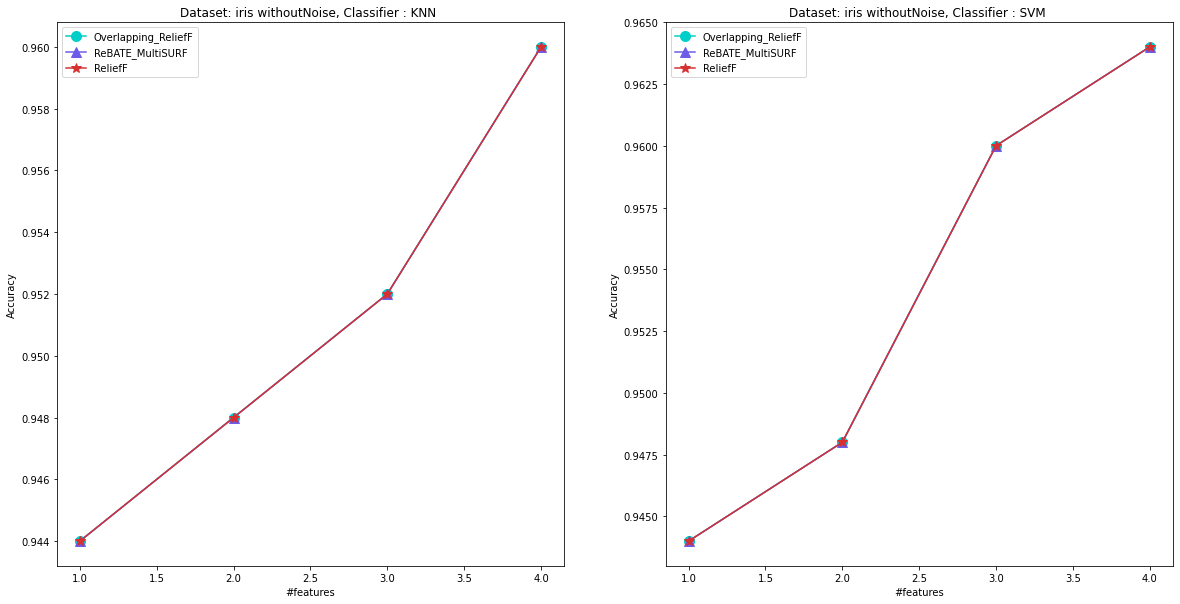

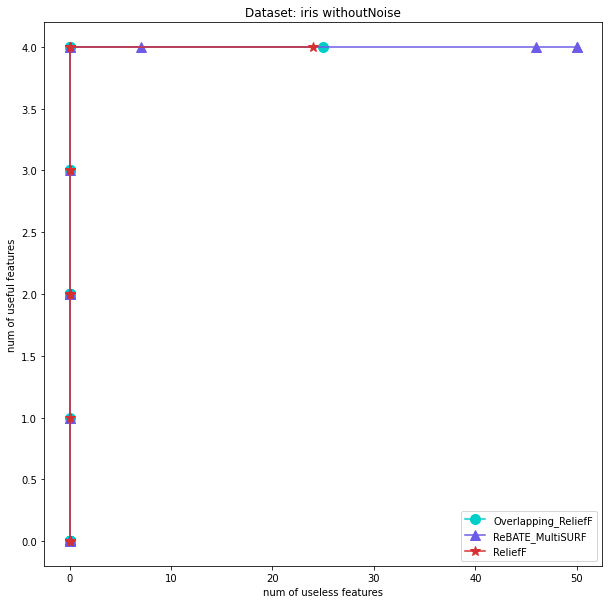

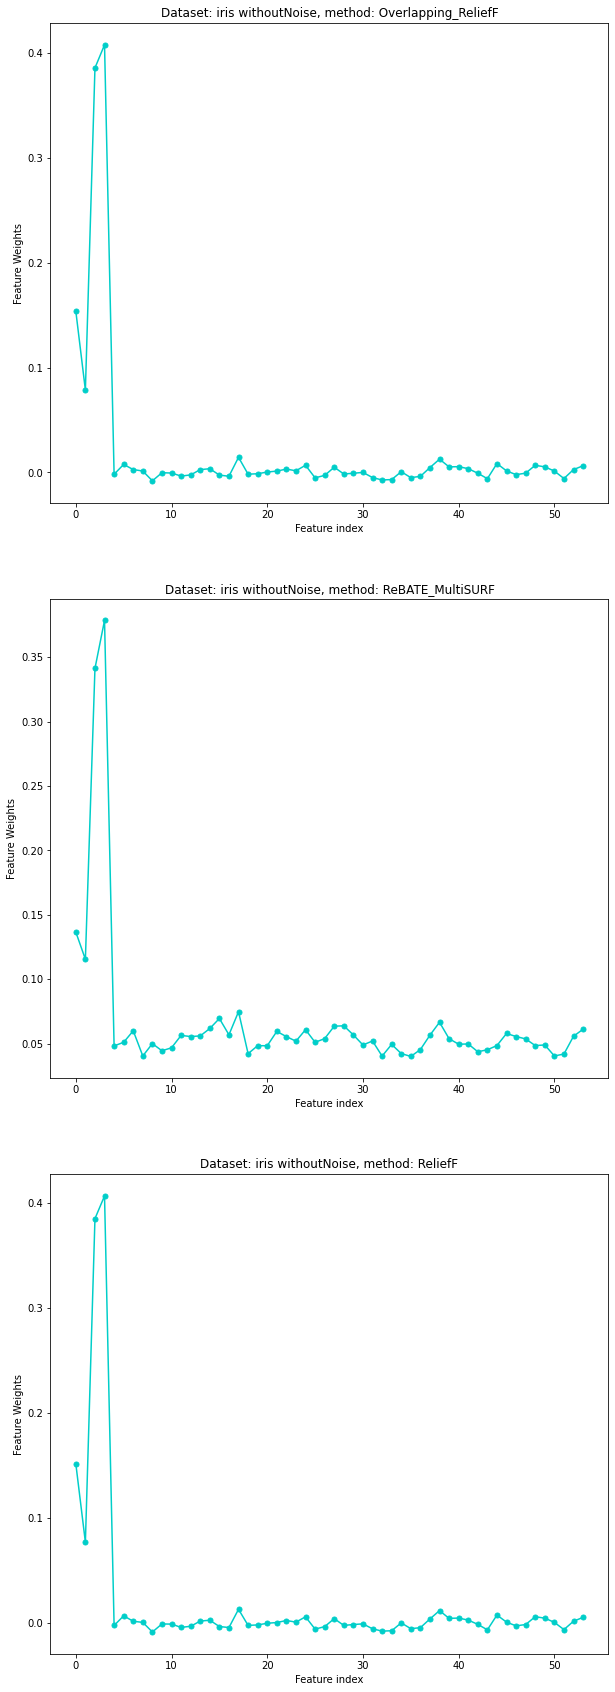

In [ ]:
run_and_save_output(dName = 'iris')
# run_and_save_output(dName = 'iris', noisePercentage=10)
plotting_accuracy('iris')
plotting_roc('iris')
plotting_weights('iris')

### Dermatology (Imbalanced)

dataset: dermatology
instances = 366, features= 34 
Dataset Name : dermatology
#features                             1         4   ...        30        34
Classifier Method                                   ...                    
KNN        ReliefF              0.471084  0.771084  ...  0.957831  0.949398
           Overlapping_ReliefF  0.471084  0.771084  ...  0.959036  0.949398
           ReBATE_MultiSURF     0.471084  0.649398  ...  0.937349  0.931325
SVM        ReliefF              0.496386  0.773494  ...  0.974699  0.962651
           Overlapping_ReliefF  0.496386  0.773494  ...  0.973494  0.962651
           ReBATE_MultiSURF     0.496386  0.662651  ...  0.959036  0.951807

[6 rows x 10 columns]
ConfusionMatrix for the dataset dermatology and classifier SVM (Noisy = False)
#features                              1   ...            34
Method              Classes                ...              
ReliefF             1.0      A=255,TP=242  ...  A=255,TP=255
                    2.0     

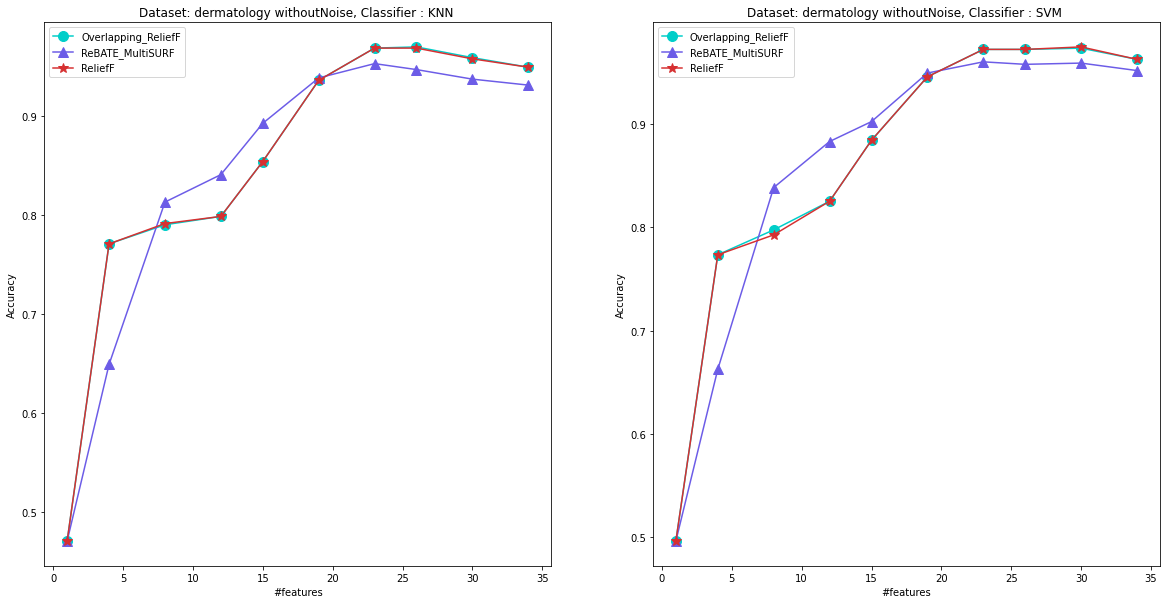

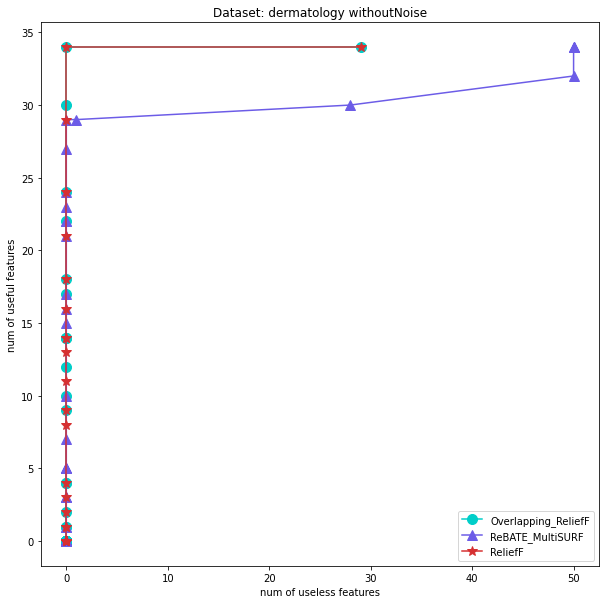

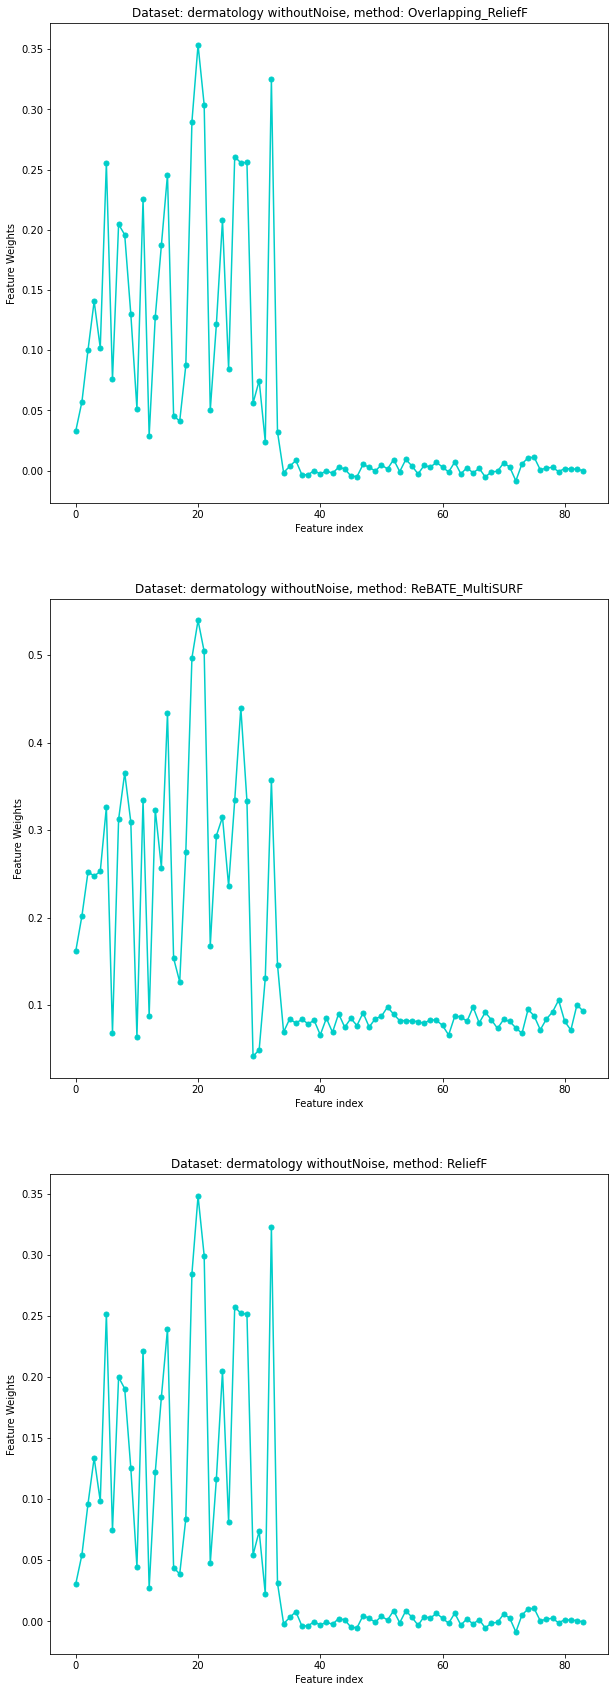

In [ ]:
run_and_save_output(dName = 'dermatology')
# run_and_save_output(dName = 'dermatology', noisePercentage=10)
plotting_accuracy('dermatology')
plotting_roc('dermatology')
plotting_weights('dermatology')

### Sonar

dataset: sonar
instances = 208, features= 60 
Dataset Name : sonar
#features                             1         7   ...        53        60
Classifier Method                                   ...                    
KNN        ReliefF              0.697674  0.753488  ...  0.762791  0.744186
           Overlapping_ReliefF  0.697674  0.744186  ...  0.762791  0.753488
           ReBATE_MultiSURF     0.688372  0.744186  ...  0.753488  0.776744
SVM        ReliefF              0.739535  0.748837  ...  0.730233  0.711628
           Overlapping_ReliefF  0.739535  0.734884  ...  0.730233  0.725581
           ReBATE_MultiSURF     0.734884  0.744186  ...  0.725581  0.711628

[6 rows x 10 columns]
ConfusionMatrix for the dataset sonar and classifier SVM (Noisy = False)
#features                             1            7   ...           53           60
Method              Classes                            ...                          
ReliefF             M        A=115,TP=96  A=115,TP=92  ... 

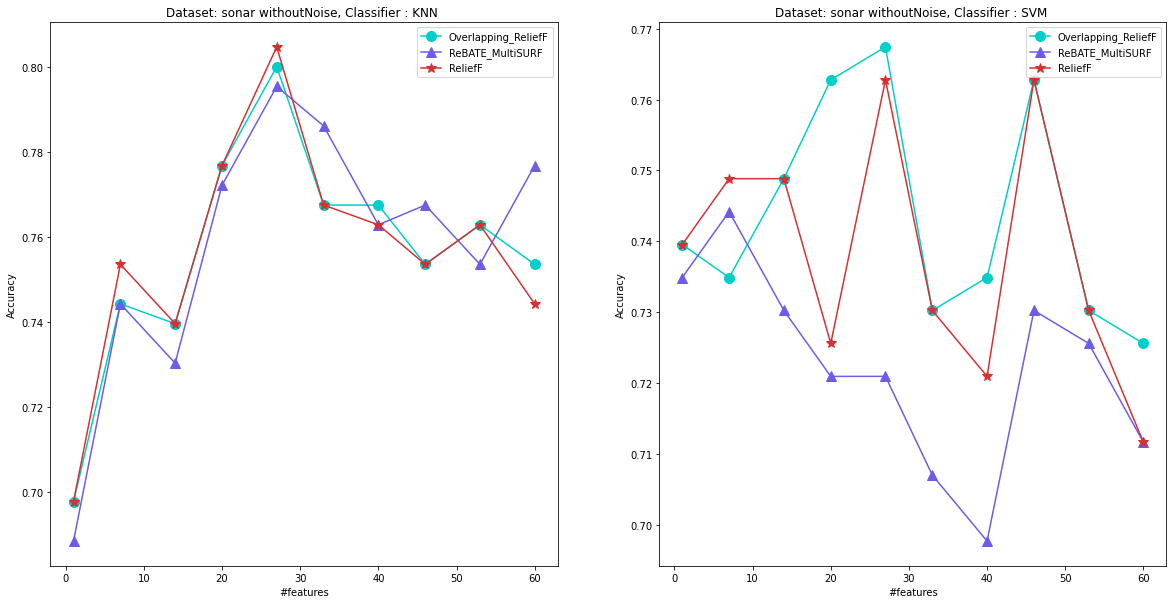

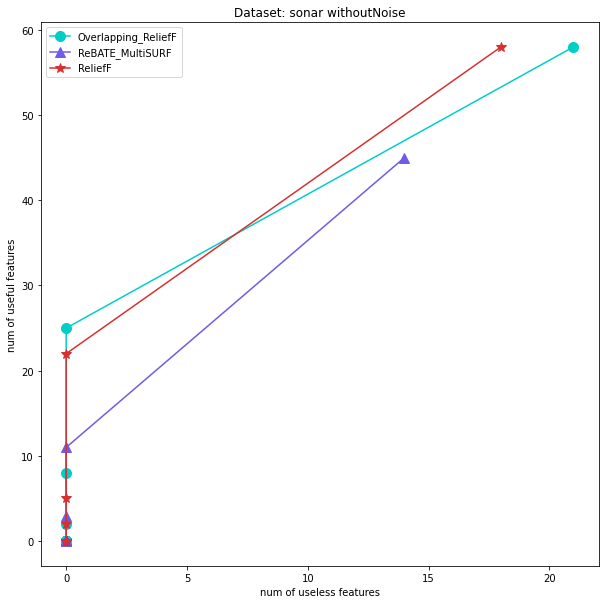

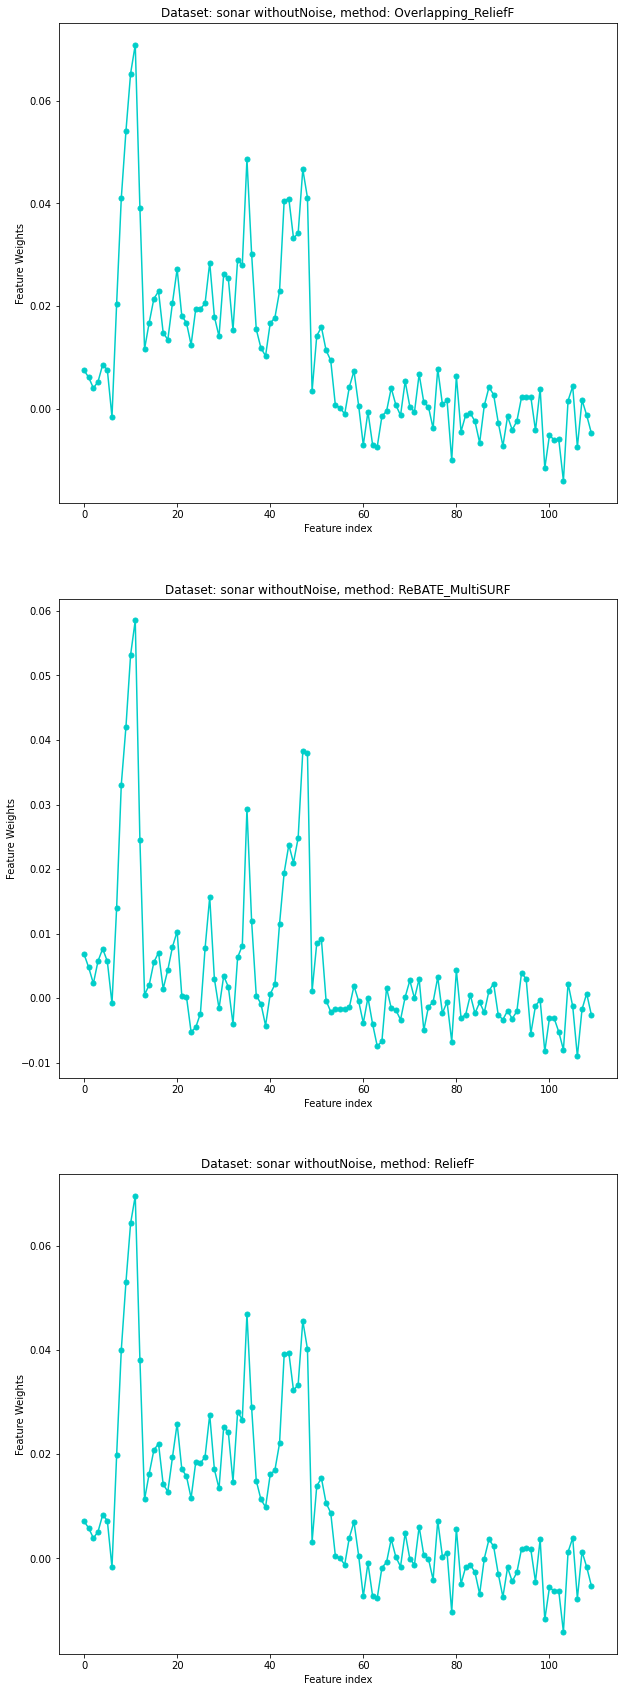

In [ ]:
run_and_save_output(dName = 'sonar')
# run_and_save_output(dName = 'sonar', noisePercentage=10)
plotting_accuracy('sonar')
plotting_roc('sonar')
plotting_weights('sonar')

### Wine

dataset: wine
instances = 178, features= 13 
Dataset Name : wine
#features                             1         2   ...        11        13
Classifier Method                                   ...                    
KNN        ReliefF              0.717949  0.871795  ...  0.961538  0.964103
           Overlapping_ReliefF  0.717949  0.871795  ...  0.961538  0.964103
           ReBATE_MultiSURF     0.689744  0.833333  ...  0.958974  0.953846
SVM        ReliefF              0.656410  0.848718  ...  0.964103  0.964103
           Overlapping_ReliefF  0.656410  0.848718  ...  0.964103  0.964103
           ReBATE_MultiSURF     0.679487  0.807692  ...  0.966667  0.964103

[6 rows x 10 columns]
ConfusionMatrix for the dataset wine and classifier SVM (Noisy = False)
#features                              1   ...            13
Method              Classes                ...              
ReliefF             0.0       A=130,TP=85  ...  A=130,TP=130
                    1.0       A=155,TP=93  ...  A

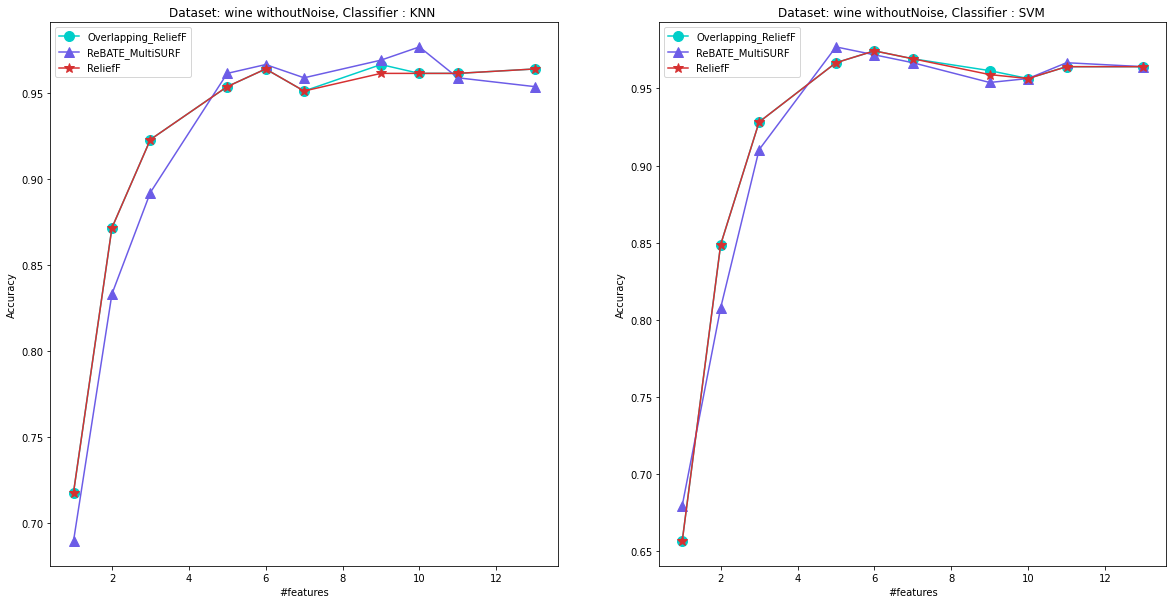

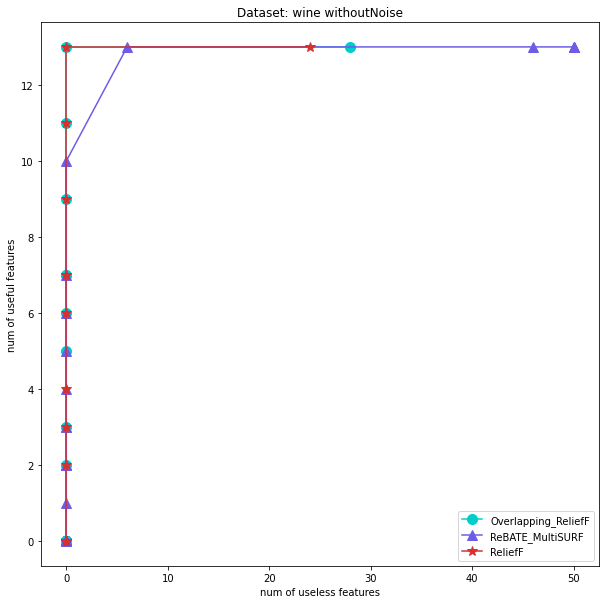

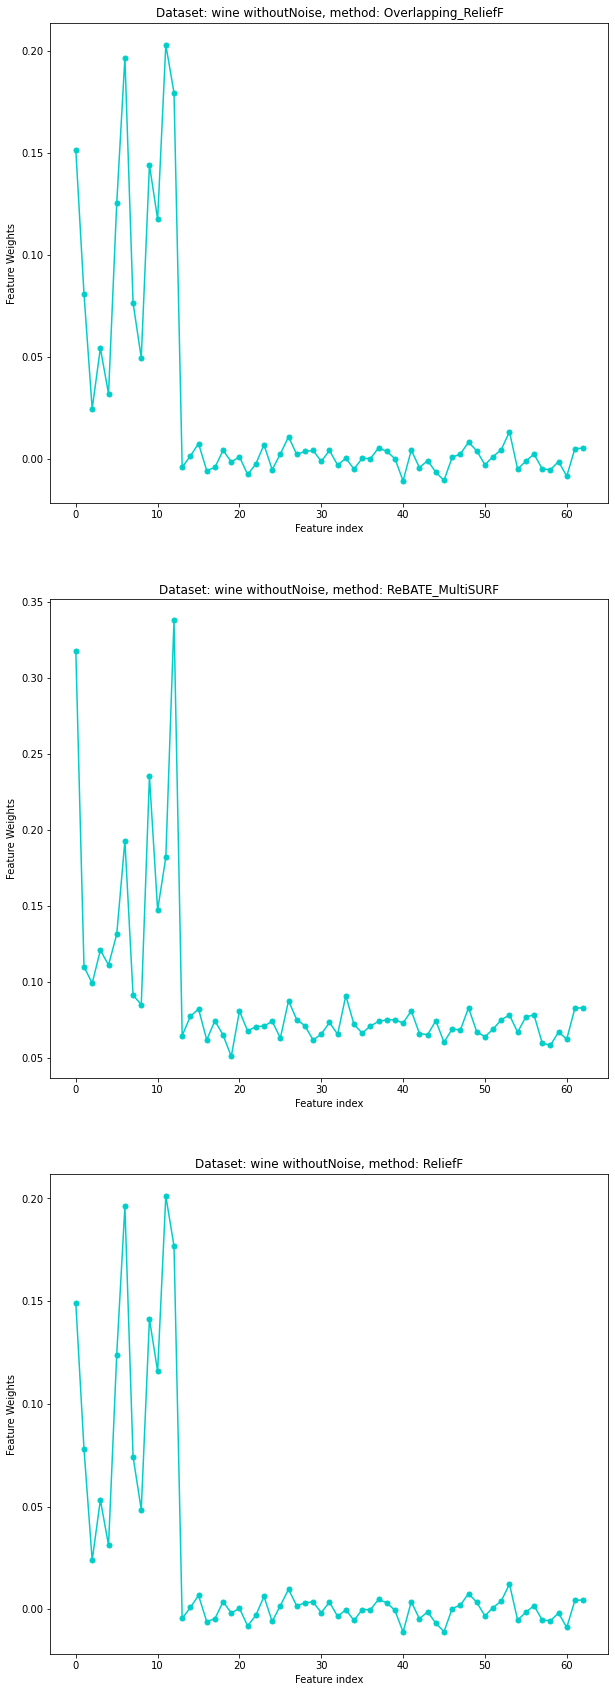

In [ ]:
run_and_save_output(dName = 'wine')
# run_and_save_output(dName = 'wine', noisePercentage=10)
plotting_accuracy('wine')
plotting_roc('wine')
plotting_weights('wine')

### Australian

dataset: australian
instances = 690, features= 14 
Dataset Name : australian
#features                             1         2   ...        12        14
Classifier Method                                   ...                    
KNN        ReliefF              0.855172  0.833793  ...  0.851034  0.840000
           Overlapping_ReliefF  0.855172  0.833793  ...  0.844828  0.840000
           ReBATE_MultiSURF     0.855172  0.833793  ...  0.850345  0.850345
SVM        ReliefF              0.855172  0.855172  ...  0.853793  0.851034
           Overlapping_ReliefF  0.855172  0.855172  ...  0.852414  0.851034
           ReBATE_MultiSURF     0.855172  0.855172  ...  0.850345  0.853103

[6 rows x 10 columns]
ConfusionMatrix for the dataset australian and classifier SVM (Noisy = False)
#features                              1   ...            14
Method              Classes                ...              
ReliefF             0.0      A=805,TP=653  ...  A=805,TP=671
                    1.0      A=

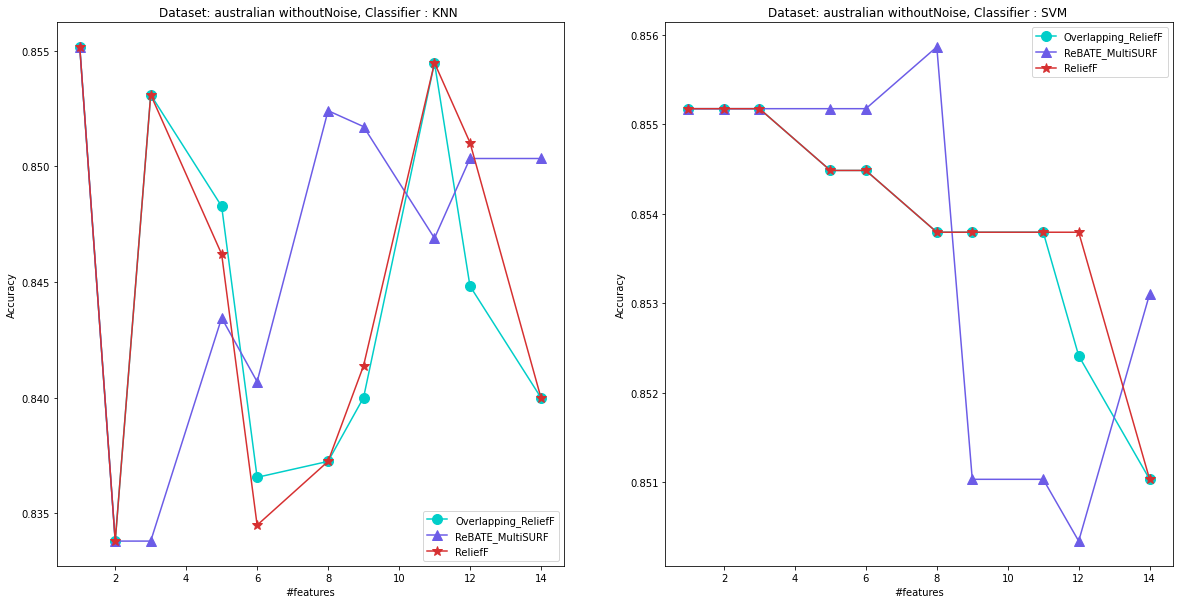

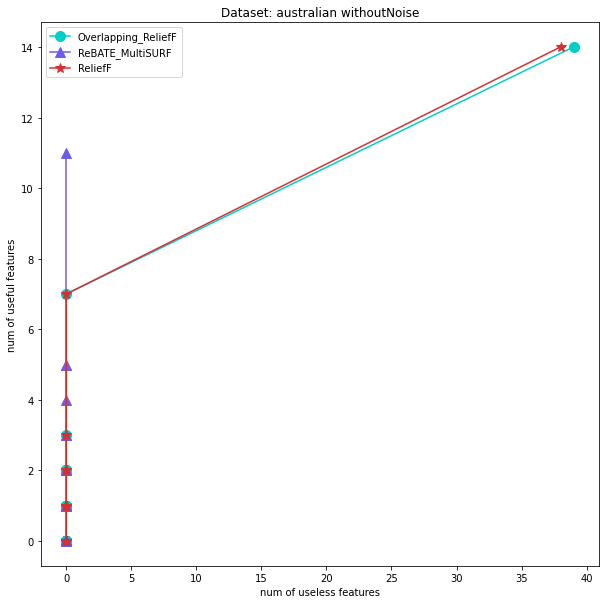

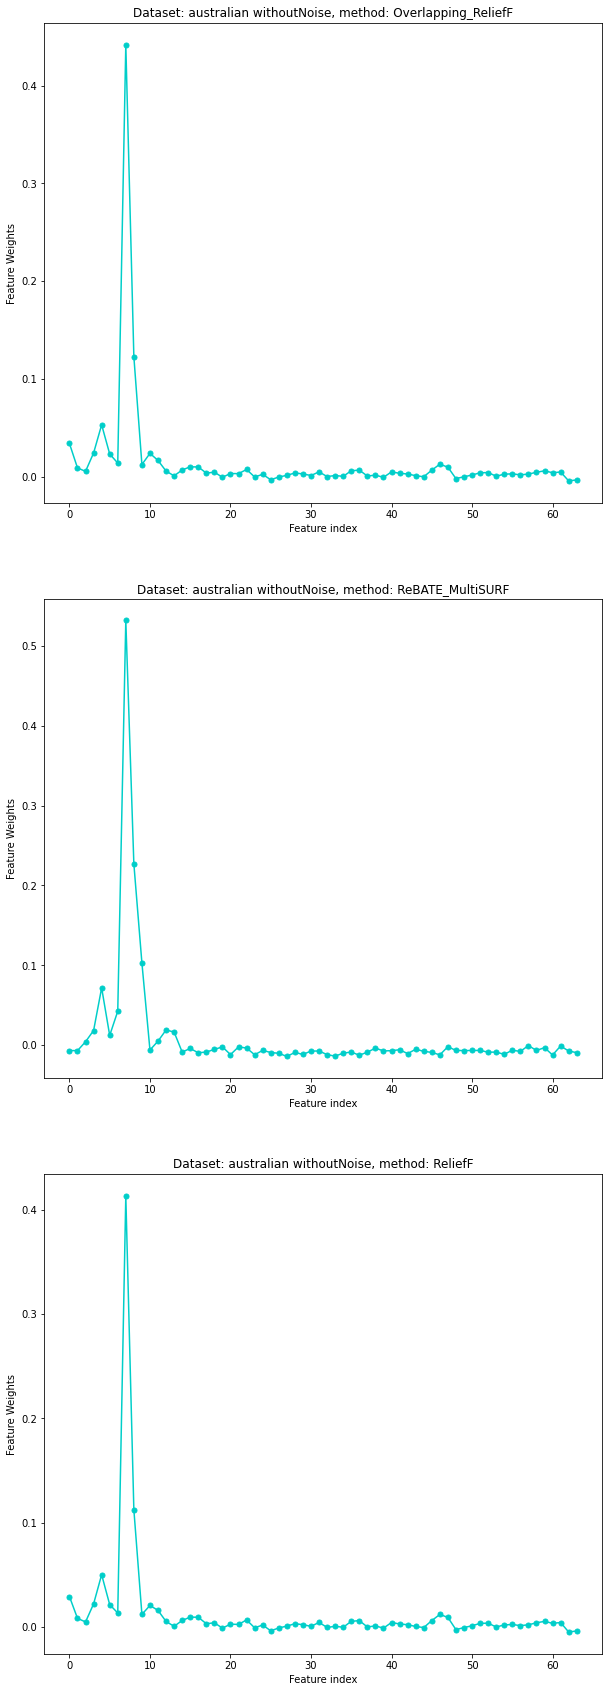

In [ ]:
run_and_save_output(dName = 'australian')
# run_and_save_output(dName = 'australian', noisePercentage=10)
plotting_accuracy('australian')
plotting_roc('australian')
plotting_weights('australian')

### BreastTissue

dataset: breastTissue
instances = 106, features= 9 
Dataset Name : breastTissue
#features                              1         2  ...         8         9
Classifier Method                                   ...                    
KNN        ReliefF              0.515385  0.561538  ...  0.661538  0.653846
           Overlapping_ReliefF  0.515385  0.561538  ...  0.661538  0.653846
           ReBATE_MultiSURF     0.538462  0.584615  ...  0.492308  0.523077
SVM        ReliefF              0.430769  0.569231  ...  0.676923  0.646154
           Overlapping_ReliefF  0.430769  0.569231  ...  0.676923  0.646154
           ReBATE_MultiSURF     0.546154  0.576923  ...  0.576923  0.530769

[6 rows x 9 columns]
ConfusionMatrix for the dataset breastTissue and classifier SVM (Noisy = False)
#features                             1           2  ...           8           9
Method              Classes                          ...                        
ReliefF             adi      A=25,TP=25  A=25,TP

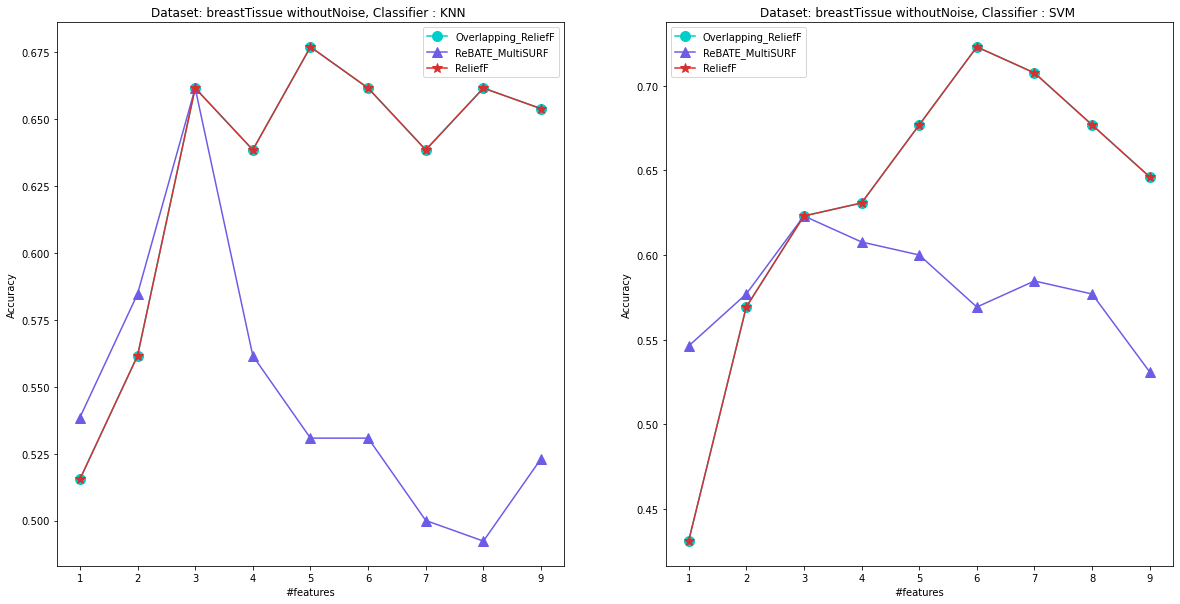

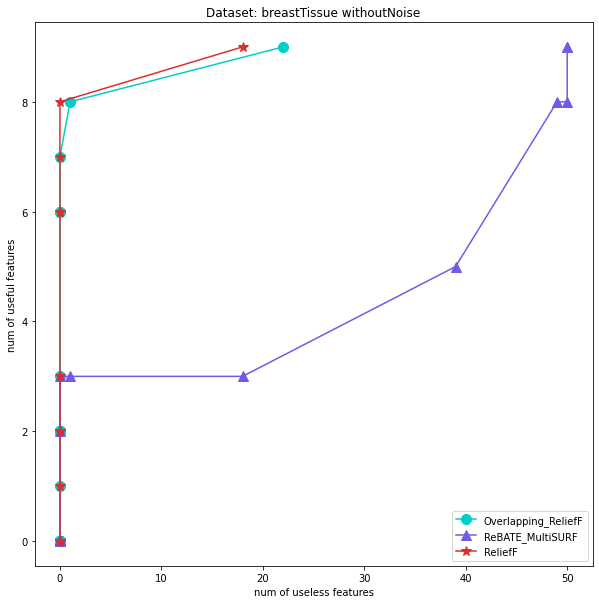

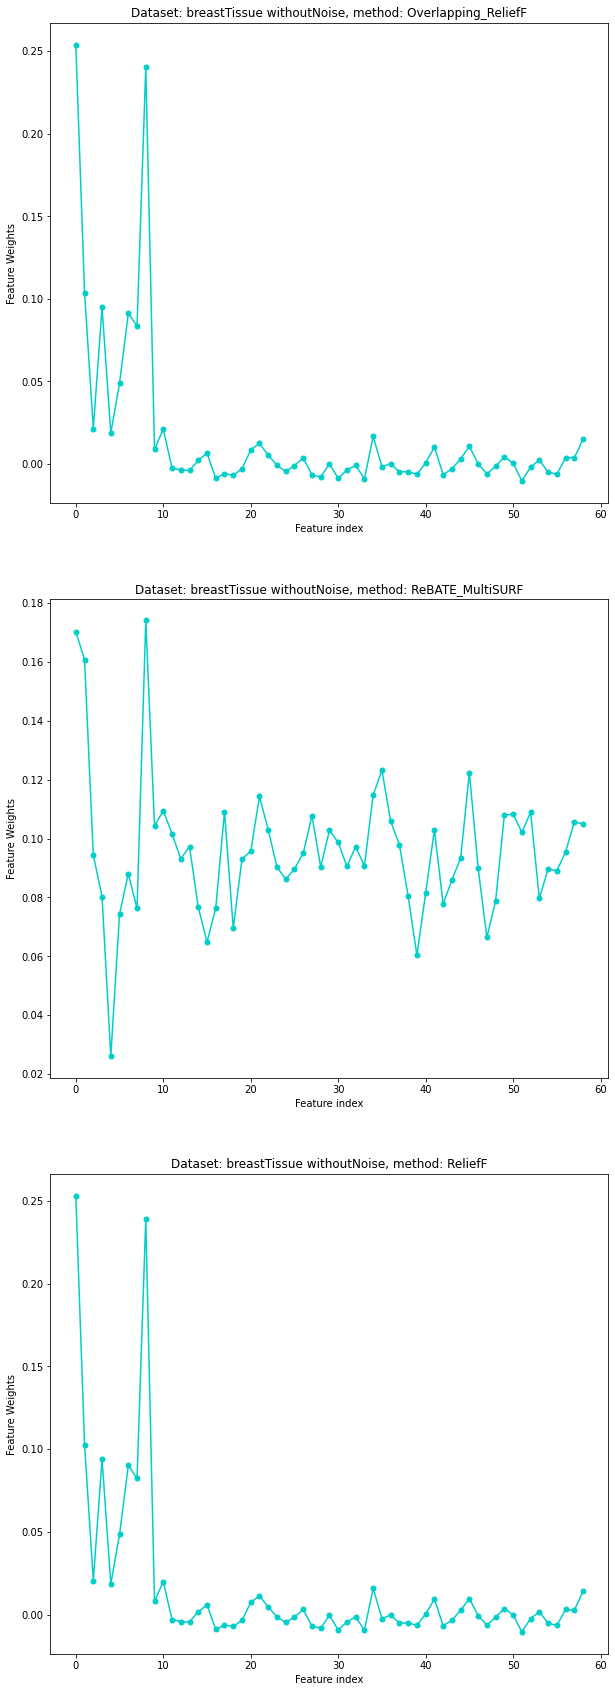

In [ ]:
run_and_save_output(dName = 'breastTissue')
# run_and_save_output(dName = 'breastTissue', noisePercentage=10)
plotting_accuracy('breastTissue')
plotting_roc('breastTissue')
plotting_weights('breastTissue')

### Pima

dataset: pima
instances = 768, features= 8 
Dataset Name : pima
#features                              1         2  ...         7         8
Classifier Method                                   ...                    
KNN        ReliefF              0.705978  0.727717  ...  0.743478  0.738043
           Overlapping_ReliefF  0.705978  0.727717  ...  0.743478  0.738043
           ReBATE_MultiSURF     0.705978  0.727717  ...  0.736957  0.733152
SVM        ReliefF              0.732065  0.730978  ...  0.753261  0.751087
           Overlapping_ReliefF  0.732065  0.730978  ...  0.753261  0.751087
           ReBATE_MultiSURF     0.732065  0.730978  ...  0.752717  0.760870

[6 rows x 8 columns]
ConfusionMatrix for the dataset pima and classifier SVM (Noisy = False)
#features                                 1  ...               8
Method              Classes                  ...                
ReliefF             0        A=1200,TP=1051  ...  A=1200,TP=1031
                    1          A=640,TP

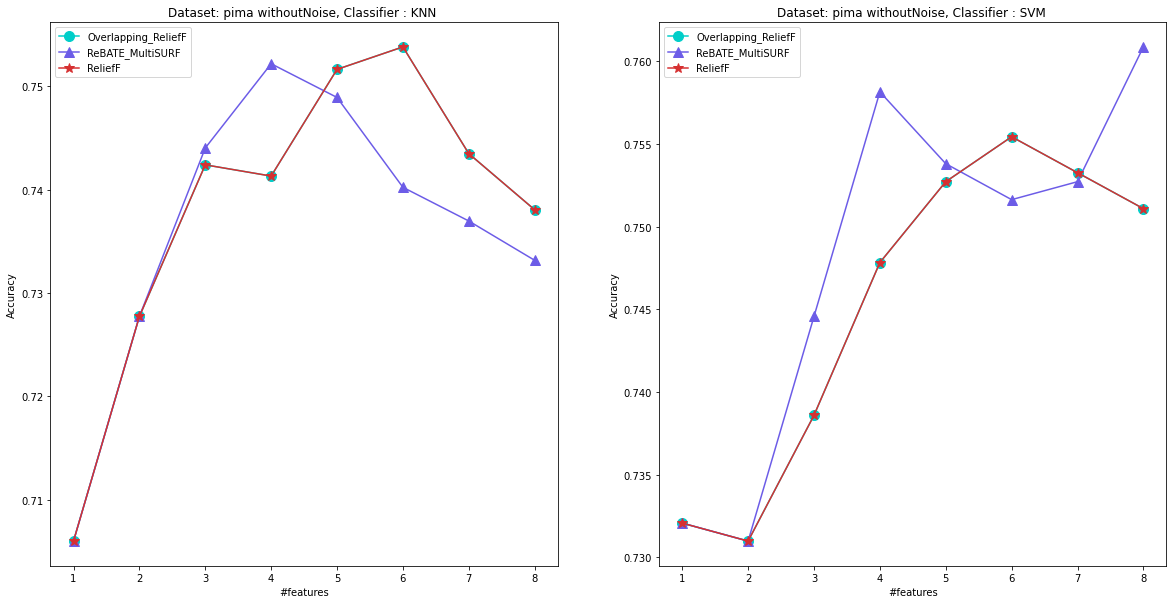

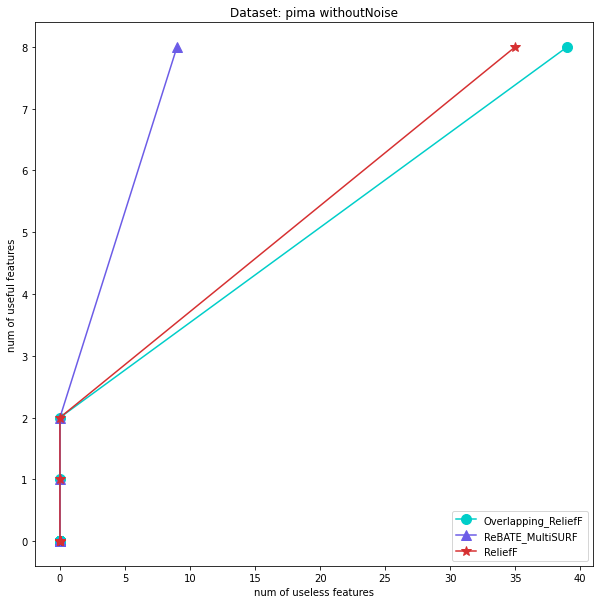

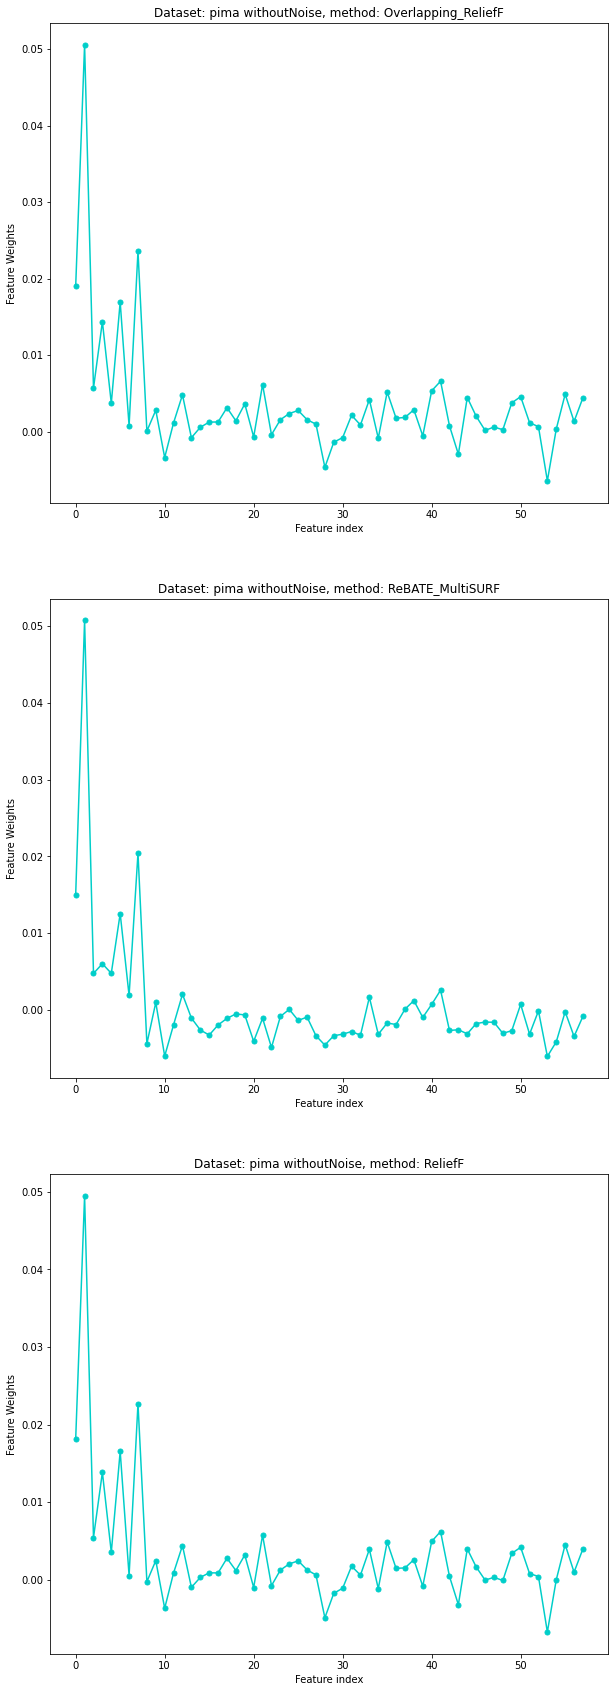

In [ ]:
run_and_save_output(dName = 'pima')
# run_and_save_output(dName = 'pima', noisePercentage=10)
plotting_accuracy('pima')
plotting_roc('pima')
plotting_weights('pima')

#Waveform

dataset: waveform
instances = 5000, features= 21 
Dataset Name : waveform
#features                             1         3   ...        18        21
Classifier Method                                   ...                    
KNN        ReliefF              0.502261  0.698739  ...  0.818826  0.806391
           Overlapping_ReliefF  0.502261  0.698739  ...  0.818826  0.806565
           ReBATE_MultiSURF     0.500043  0.671609  ...  0.764435  0.759043
SVM        ReliefF              0.522087  0.728087  ...  0.839565  0.834435
           Overlapping_ReliefF  0.522087  0.728087  ...  0.839565  0.833739
           ReBATE_MultiSURF     0.522261  0.703739  ...  0.815391  0.814739

[6 rows x 10 columns]
ConfusionMatrix for the dataset waveform and classifier SVM (Noisy = False)
#features                                1   ...              21
Method              Classes                  ...                
ReliefF             0.0      A=7625,TP=6315  ...  A=7625,TP=6056
                    1.0 

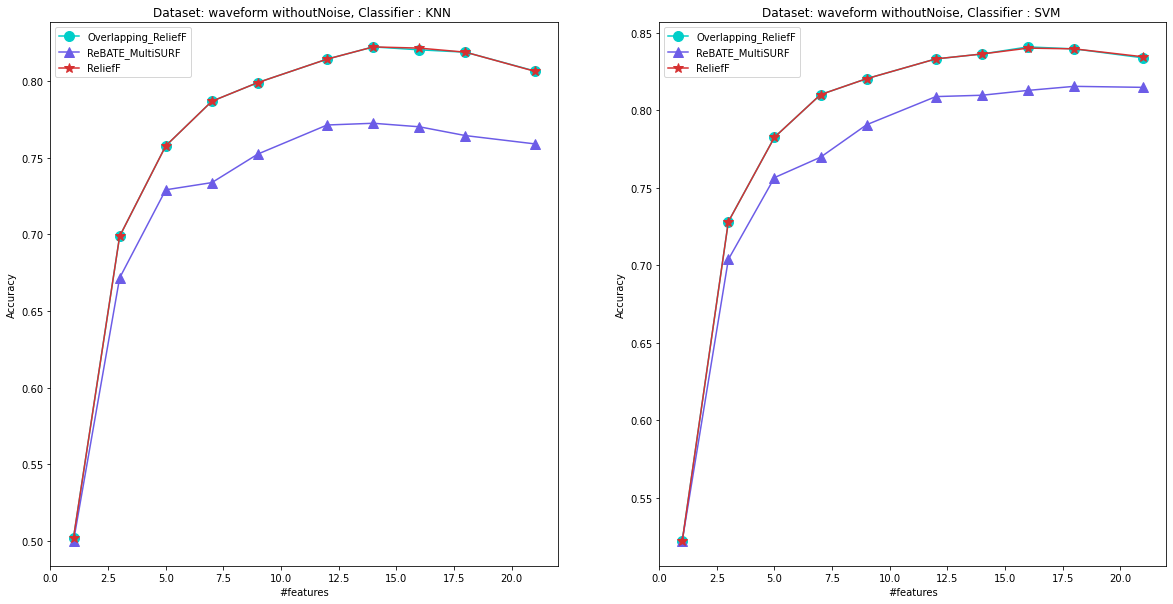

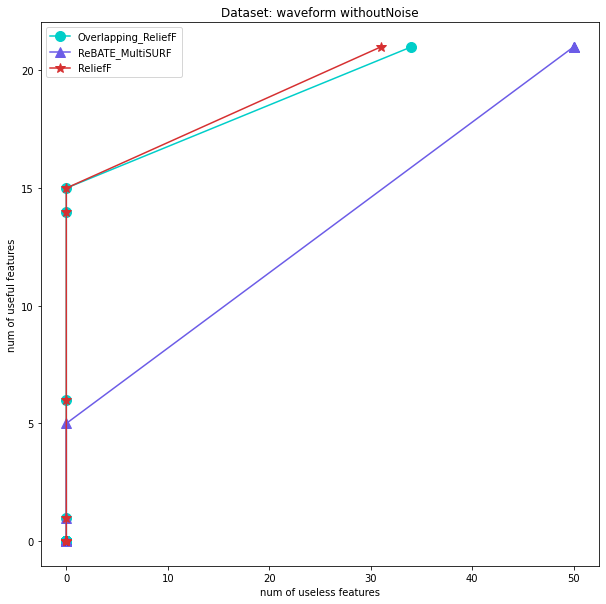

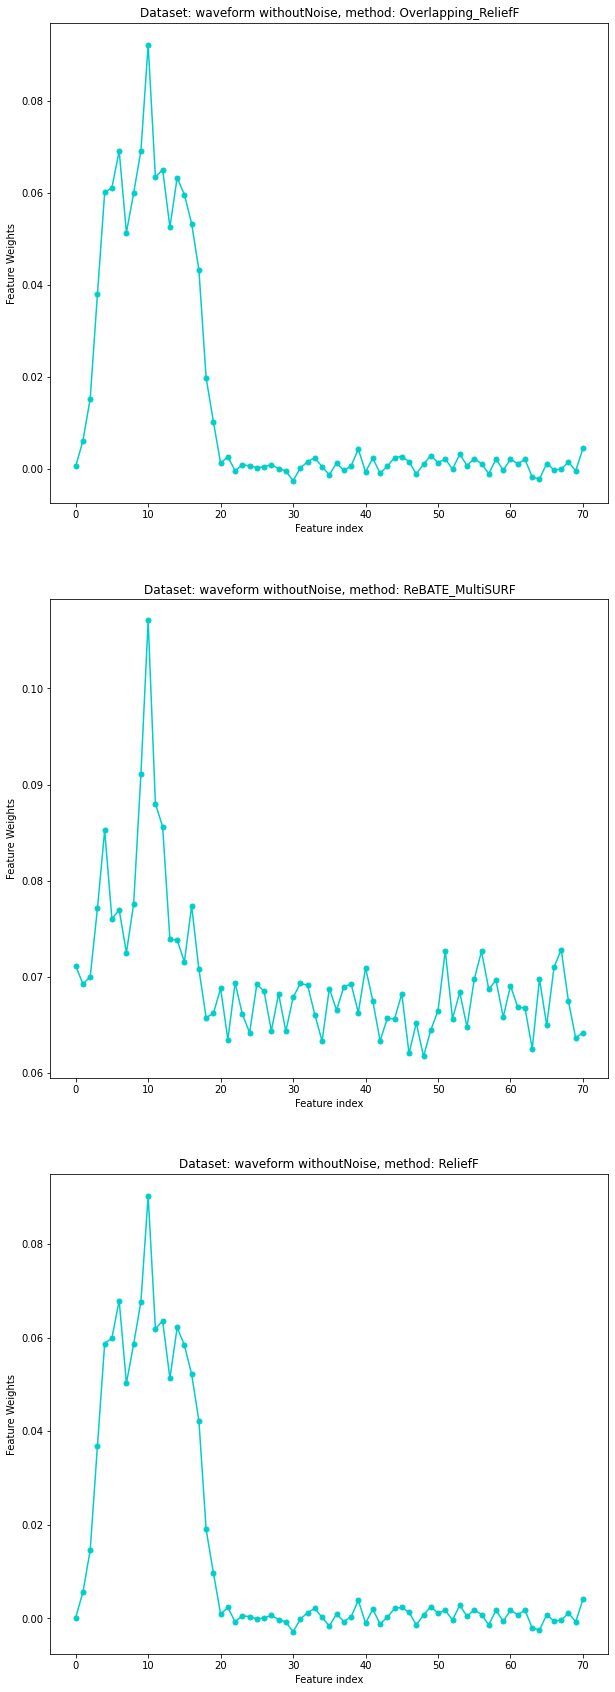

In [ ]:
run_and_save_output(dName = 'waveform')
# run_and_save_output(dName = 'waveform', noisePercentage=10)
plotting_accuracy('waveform')
plotting_roc('waveform')
plotting_weights('waveform')

### Yeast(Imbalanced)

dataset: yeast
instances = 1484, features= 8 
Dataset Name : yeast
#features                              1         2  ...         7         8
Classifier Method                                   ...                    
KNN        ReliefF              0.330081  0.426829  ...  0.551626  0.544106
           Overlapping_ReliefF  0.330081  0.426829  ...  0.551626  0.542073
           ReBATE_MultiSURF     0.334146  0.326016  ...  0.327846  0.323984
SVM        ReliefF              0.374797  0.446138  ...  0.565854  0.562195
           Overlapping_ReliefF  0.374797  0.446138  ...  0.565854  0.560366
           ReBATE_MultiSURF     0.362805  0.354878  ...  0.366057  0.361179

[6 rows x 8 columns]
ConfusionMatrix for the dataset yeast and classifier SVM (Noisy = False)
#features                                 1  ...               8
Method              Classes                  ...                
ReliefF             CYT      A=1535,TP=1199  ...  A=1535,TP=1107
                    ERL           A

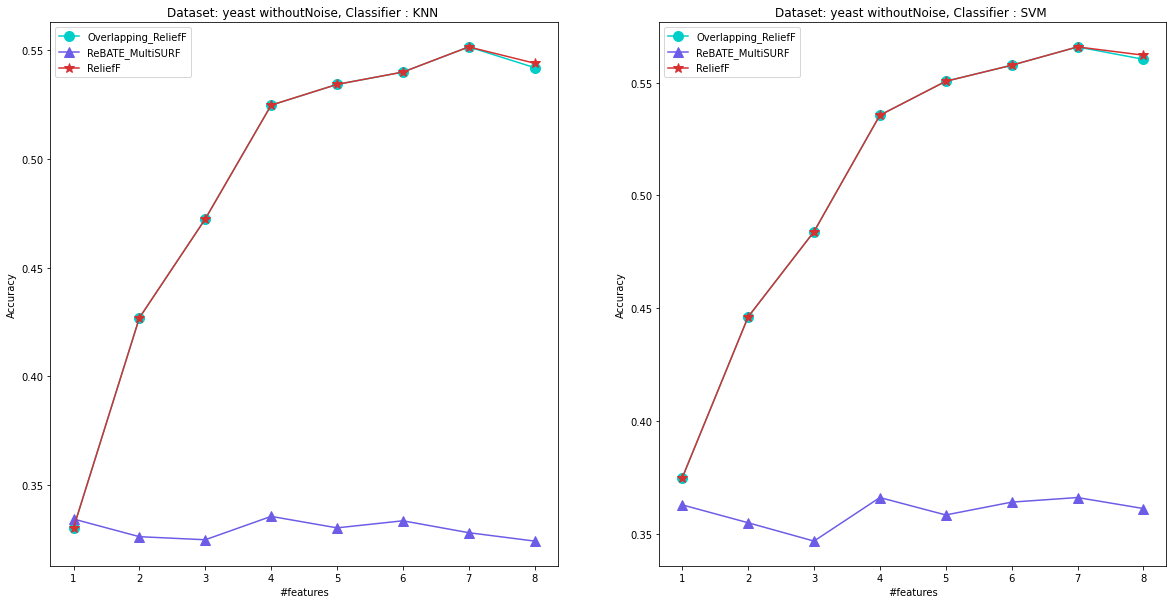

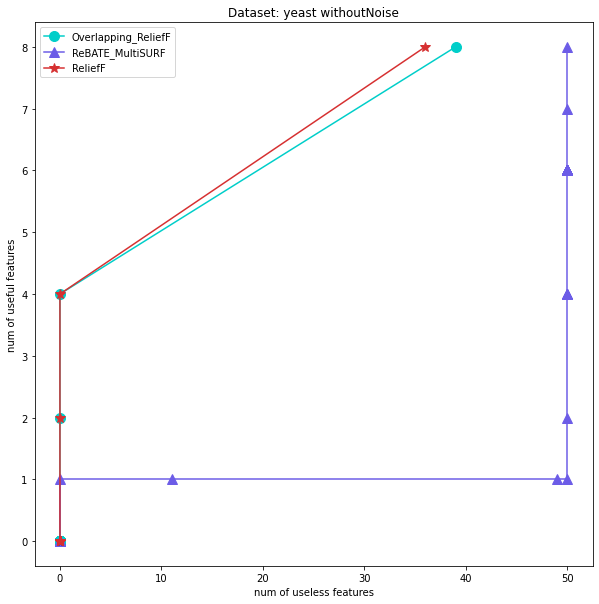

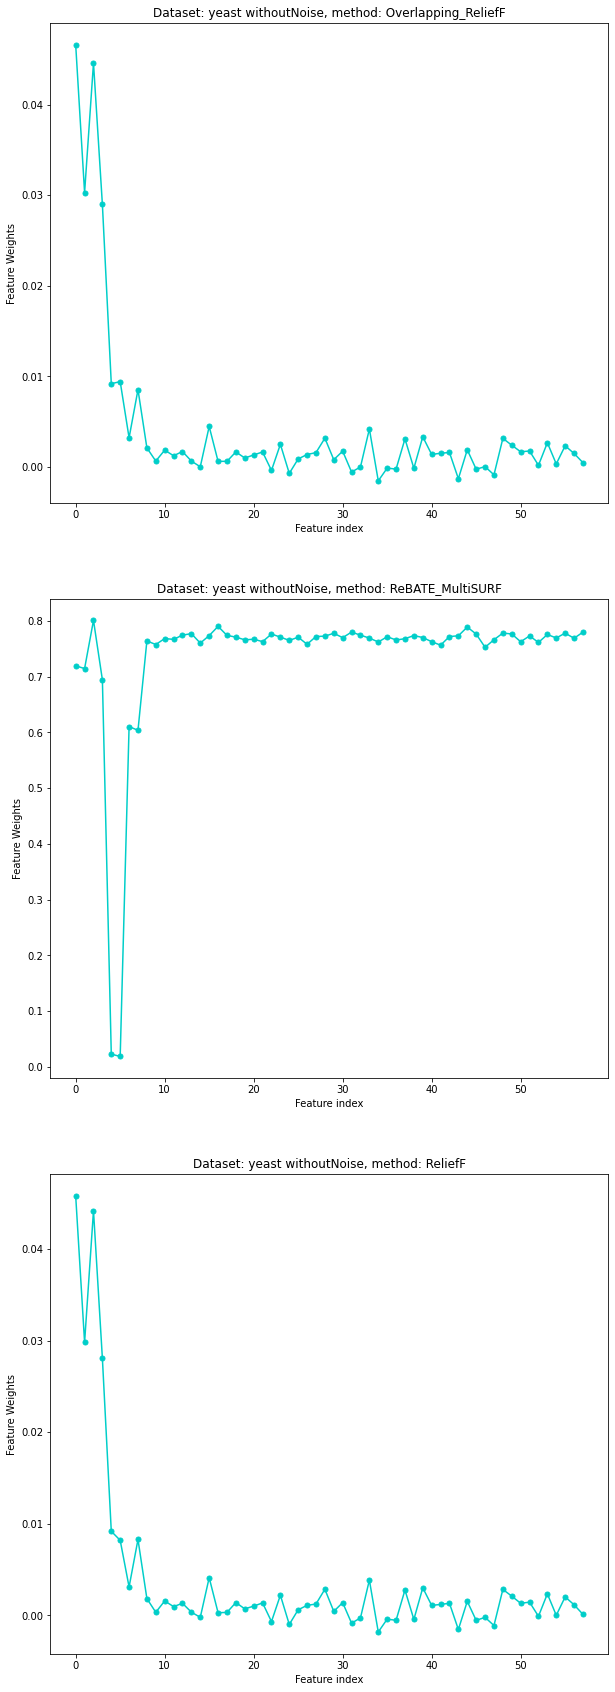

In [ ]:
run_and_save_output(dName = 'yeast')
# run_and_save_output(dName = 'yeast', noisePercentage=10)
plotting_accuracy('yeast')
plotting_roc('yeast')
plotting_weights('yeast')

### Libras

dataset: libras
instances = 360, features= 90 
Dataset Name : libras
#features                            1        10  ...       80       90
Classifier Method                                 ...                  
KNN        ReliefF              0.17500  0.35125  ...  0.62750  0.61500
           Overlapping_ReliefF  0.17500  0.35125  ...  0.62875  0.61500
           ReBATE_MultiSURF     0.16125  0.37000  ...  0.61875  0.62625
SVM        ReliefF              0.19875  0.35250  ...  0.77750  0.76875
           Overlapping_ReliefF  0.19875  0.35250  ...  0.77750  0.76875
           ReBATE_MultiSURF     0.16625  0.44000  ...  0.64000  0.64625

[6 rows x 10 columns]
ConfusionMatrix for the dataset libras and classifier SVM (Noisy = False)
#features                            1           10  ...          80          90
Method              Classes                          ...                        
ReliefF             1.0       A=53,TP=0  A=53,TP=33  ...  A=53,TP=43  A=53,TP=43
               

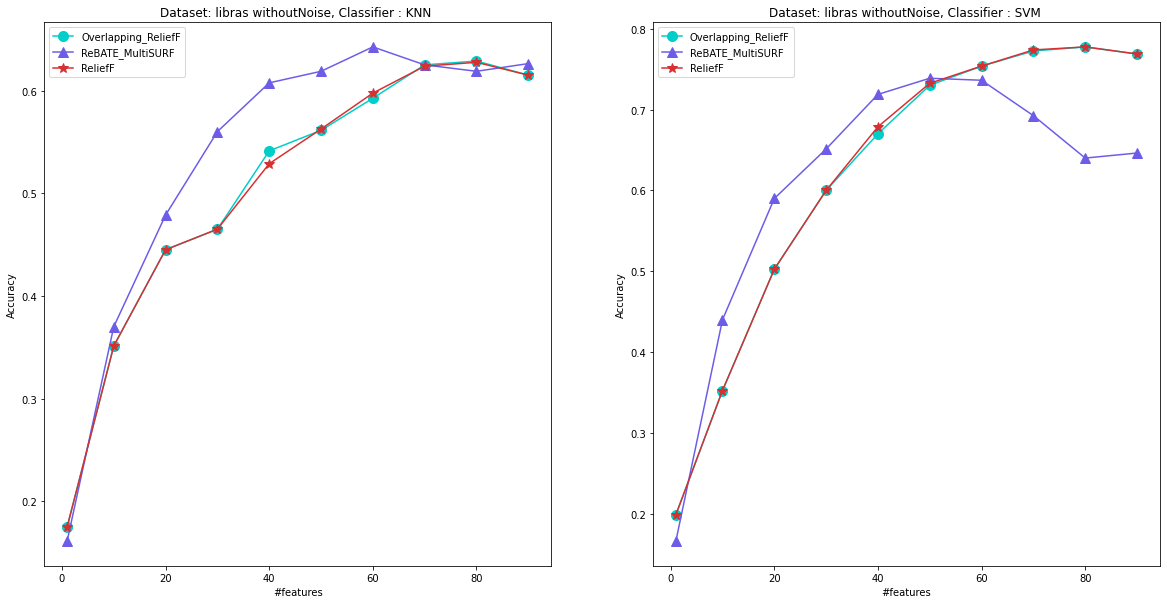

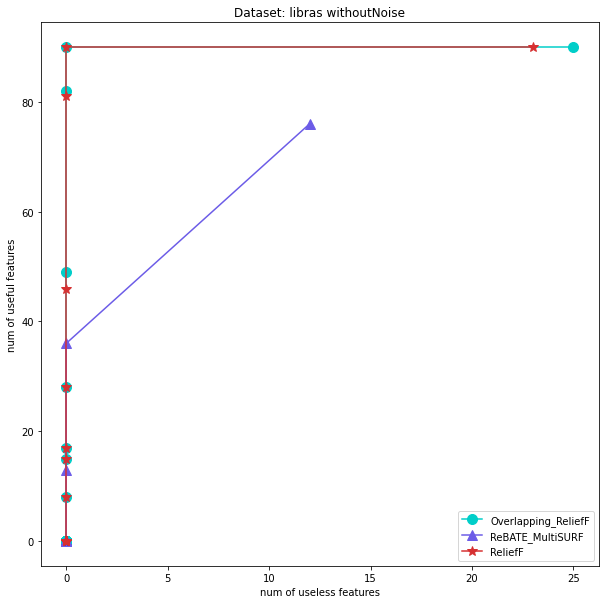

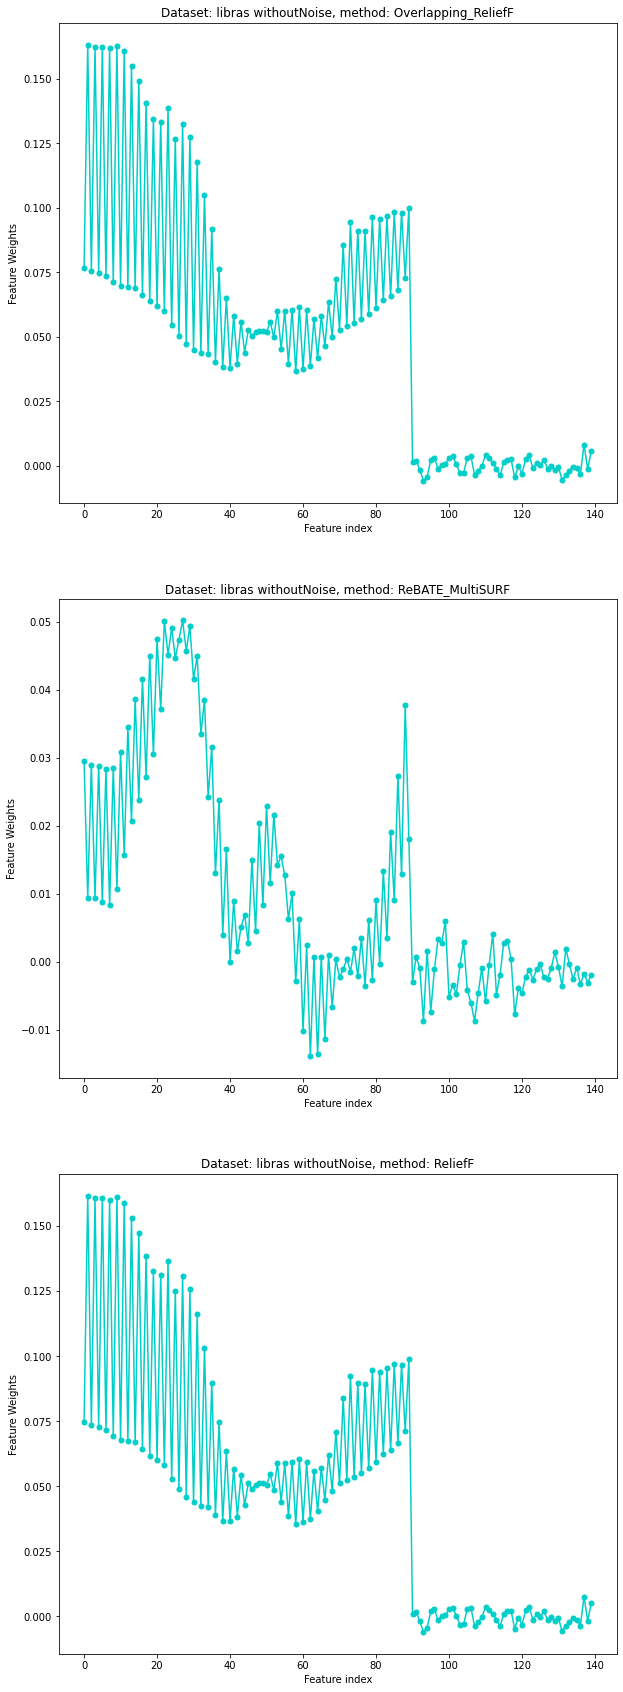

In [ ]:
run_and_save_output(dName = 'libras')
# run_and_save_output(dName = 'libras', noisePercentage=10)
plotting_accuracy('libras')
plotting_roc('libras')
plotting_weights('libras')

### Arrhythmia

dataset: arrhythmia
instances = 452, features= 279 
Dataset Name : arrhythmia
#features                            1         31   ...       248       279
Classifier Method                                   ...                    
KNN        ReliefF              0.505941  0.636634  ...  0.567327  0.564356
           Overlapping_ReliefF  0.505941  0.633663  ...  0.570297  0.564356
           ReBATE_MultiSURF     0.578218  0.610891  ...  0.575248  0.577228
SVM        ReliefF              0.539604  0.672277  ...  0.665347  0.664356
           Overlapping_ReliefF  0.539604  0.677228  ...  0.667327  0.671287
           ReBATE_MultiSURF     0.589109  0.637624  ...  0.640594  0.650495

[6 rows x 10 columns]
ConfusionMatrix for the dataset arrhythmia and classifier SVM (Noisy = False)
#features                             1    ...           279
Method              Classes                ...              
ReliefF             1.0      A=545,TP=545  ...  A=545,TP=467
                    2.0       

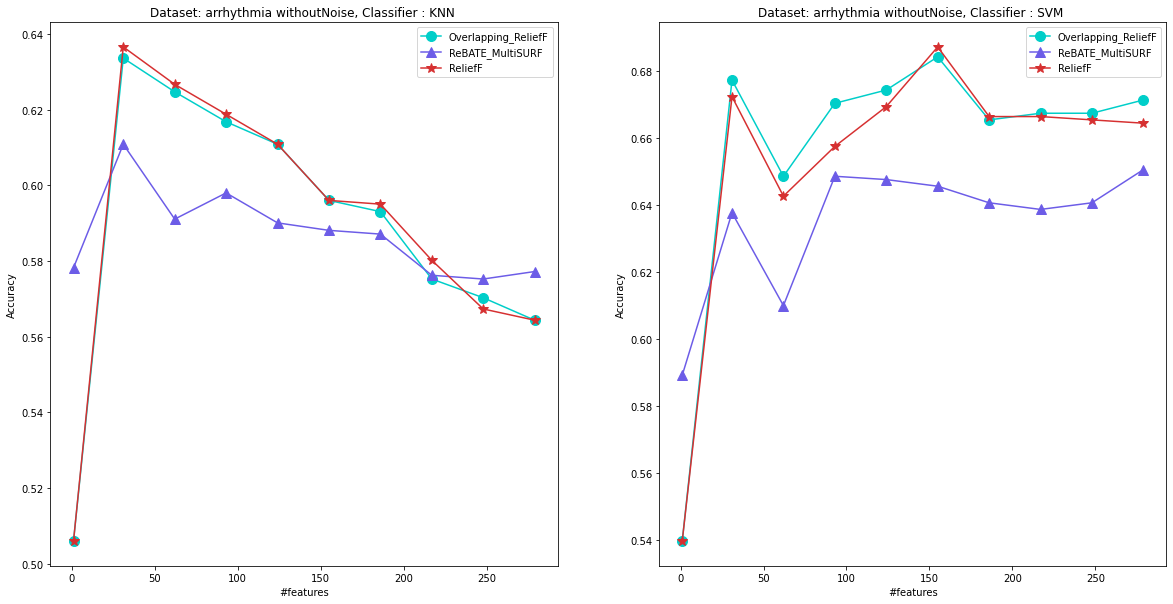

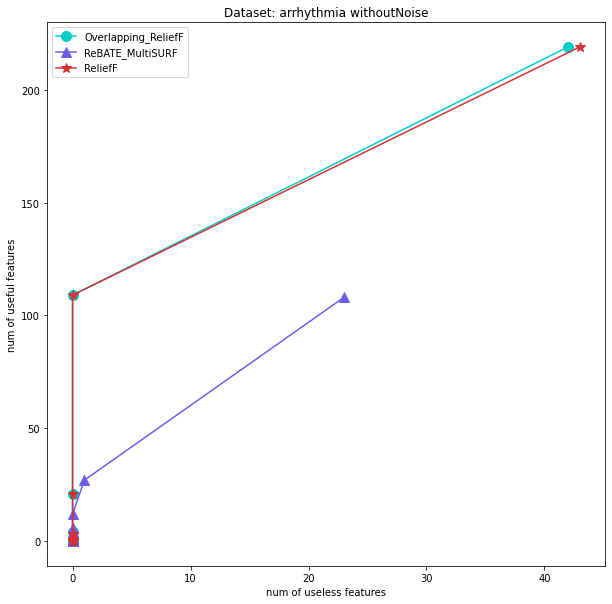

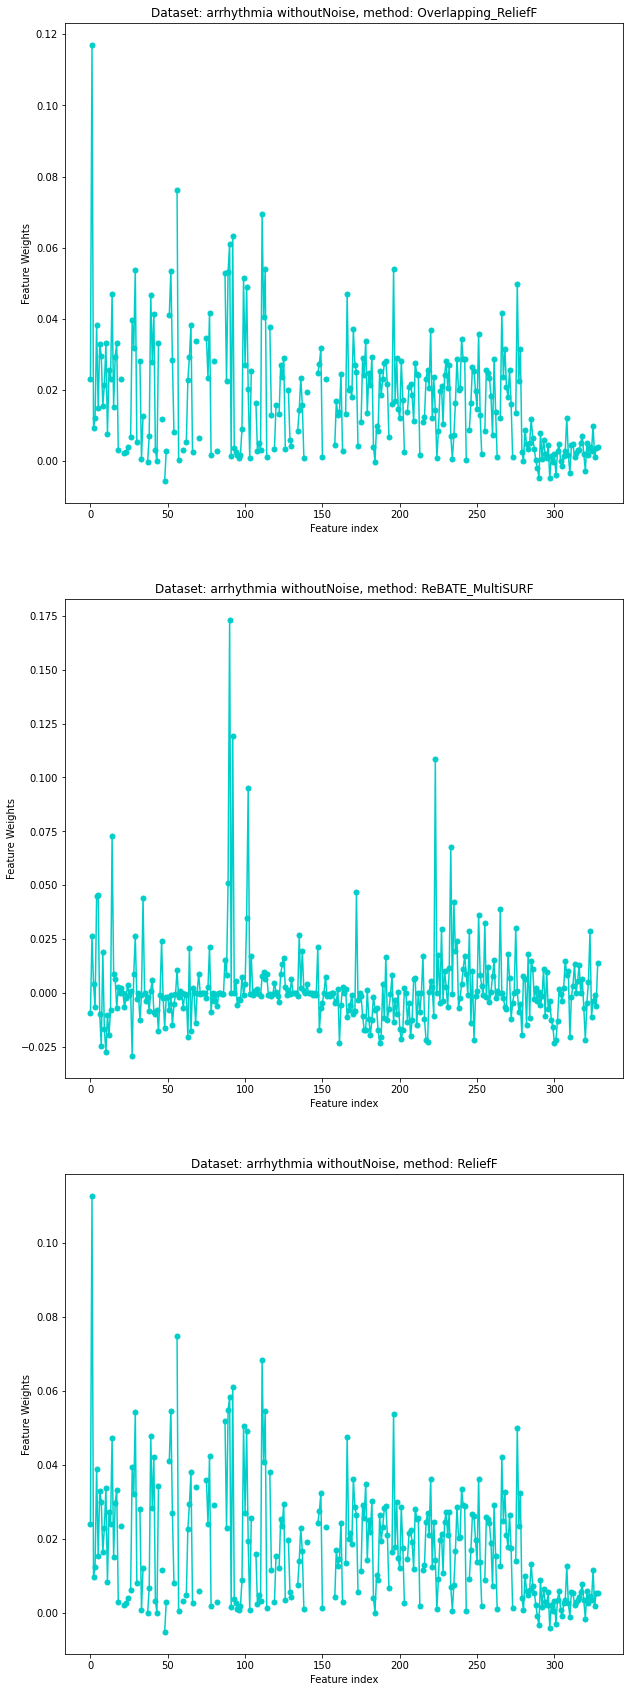

In [ ]:
run_and_save_output(dName = 'arrhythmia')
# run_and_save_output(dName = 'arrhythmia', noisePercentage=10)
plotting_accuracy('arrhythmia')
plotting_roc('arrhythmia')
plotting_weights('arrhythmia')

### Madelon

dataset: madelon
instances = 2000, features= 500 
Dataset Name : madelon
#features                            1         56   ...       444       500
Classifier Method                                   ...                    
KNN        ReliefF              0.527625  0.655125  ...  0.561250  0.551500
           Overlapping_ReliefF  0.527625  0.660000  ...  0.565000  0.552000
           ReBATE_MultiSURF     0.564375  0.630250  ...  0.557875  0.560375
SVM        ReliefF              0.573000  0.555875  ...  0.531125  0.528875
           Overlapping_ReliefF  0.573000  0.554625  ...  0.531000  0.530750
           ReBATE_MultiSURF     0.607750  0.542750  ...  0.529125  0.531750

[6 rows x 10 columns]
ConfusionMatrix for the dataset madelon and classifier SVM (Noisy = False)
#features                               1    ...             500
Method              Classes                  ...                
ReliefF             -1.0     A=4000,TP=2337  ...  A=4000,TP=2039
                     1.0  

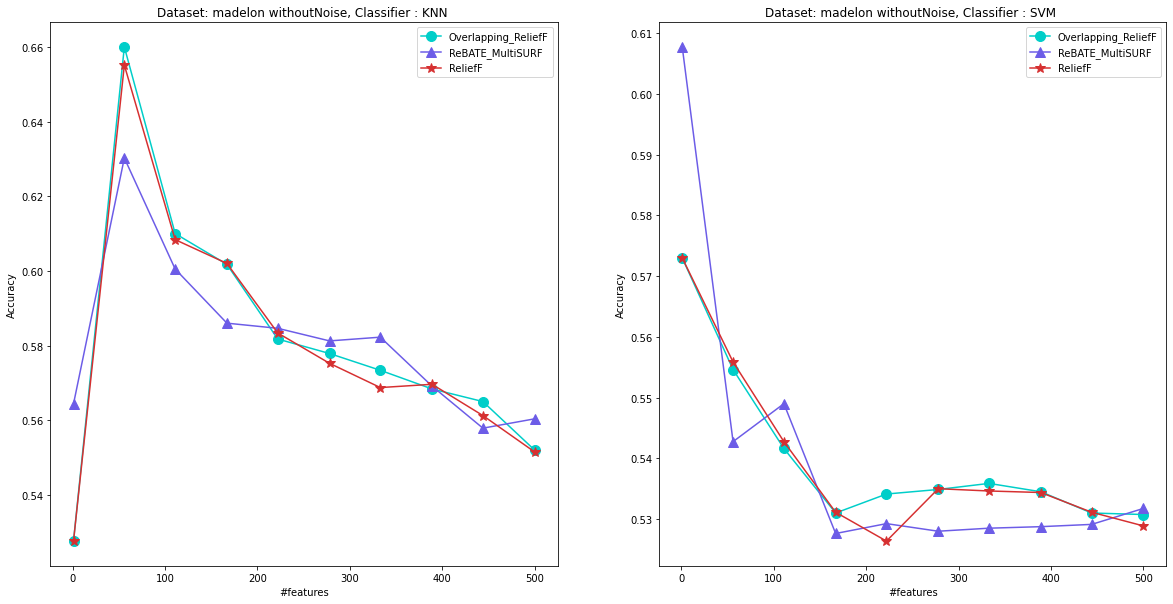

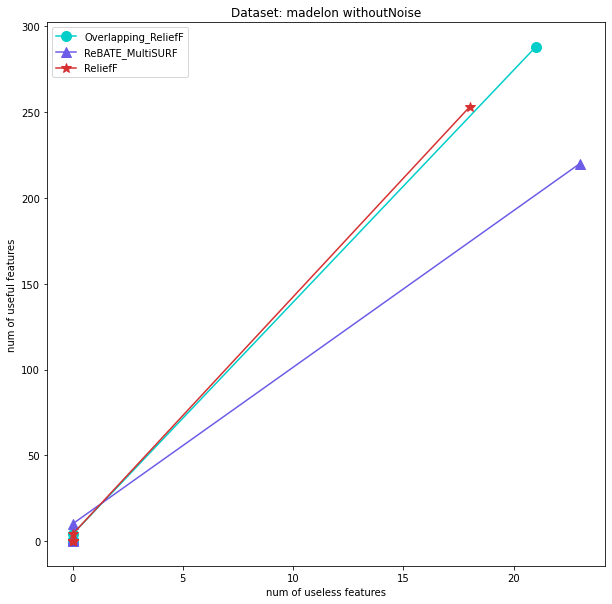

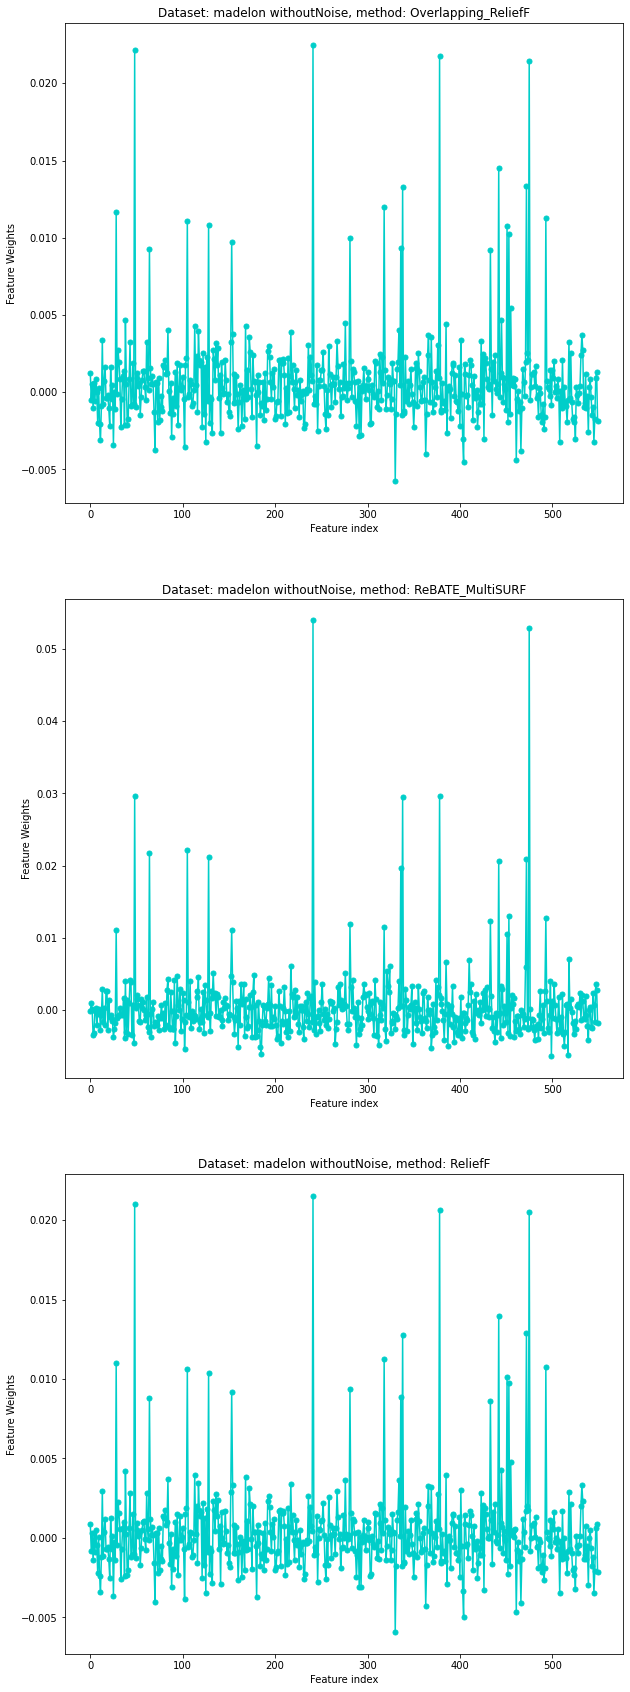

In [ ]:
run_and_save_output(dName = 'madelon')
# run_and_save_output(dName = 'madelon', noisePercentage=10)
plotting_accuracy('madelon')
plotting_roc('madelon')
plotting_weights('madelon')

### Ecoli(Imbalanced)

dataset: ecoli
instances = 336, features= 7 
Dataset Name : ecoli
#features                              1         2  ...         6         7
Classifier Method                                   ...                    
KNN        ReliefF              0.644118  0.719118  ...  0.854412  0.847059
           Overlapping_ReliefF  0.644118  0.719118  ...  0.854412  0.848529
           ReBATE_MultiSURF     0.611765  0.775000  ...  0.798529  0.775000
SVM        ReliefF              0.669118  0.719118  ...  0.850000  0.850000
           Overlapping_ReliefF  0.669118  0.719118  ...  0.850000  0.847059
           ReBATE_MultiSURF     0.651471  0.782353  ...  0.819118  0.814706

[6 rows x 7 columns]
ConfusionMatrix for the dataset ecoli and classifier SVM (Noisy = False)
#features                               1  ...             7
Method              Classes                ...              
ReliefF             cp       A=290,TP=254  ...  A=290,TP=282
                    im       A=155,TP=150  ...  

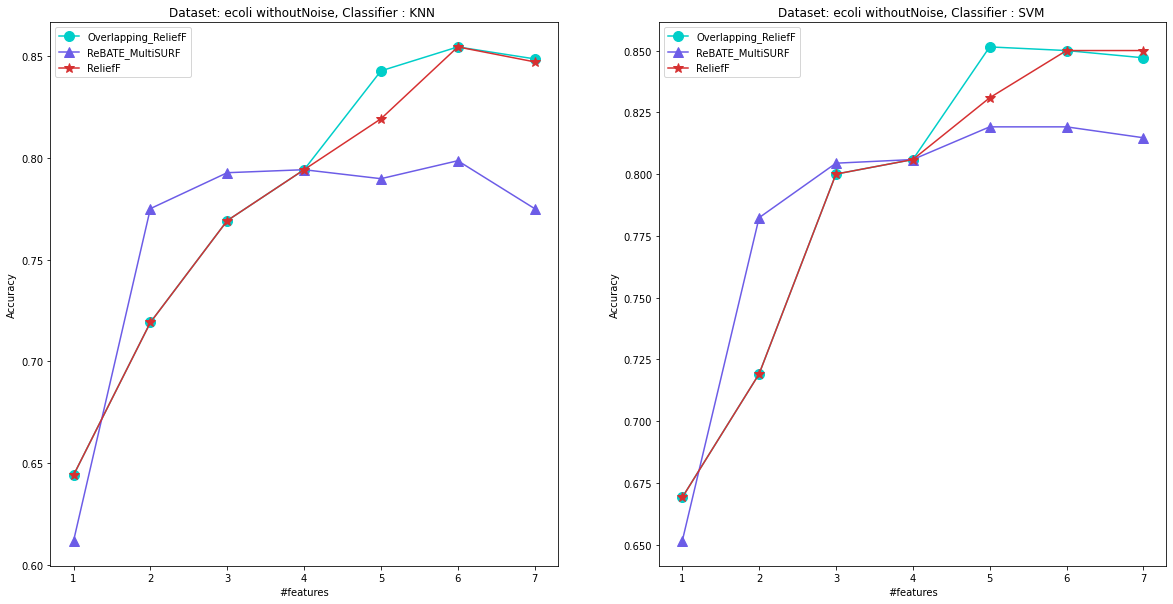

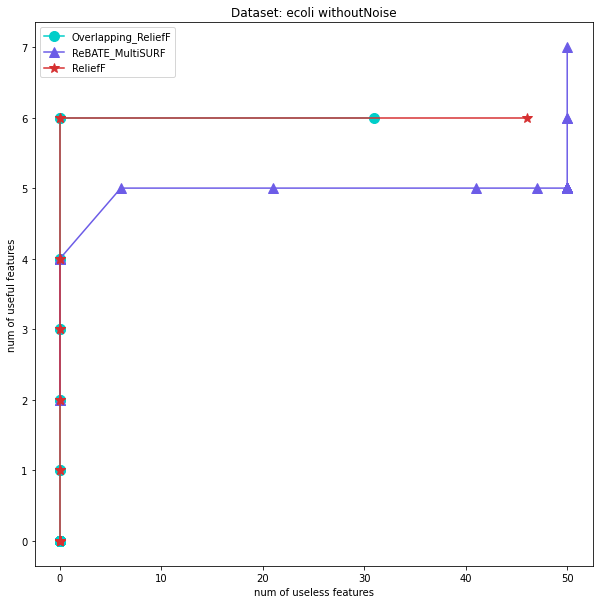

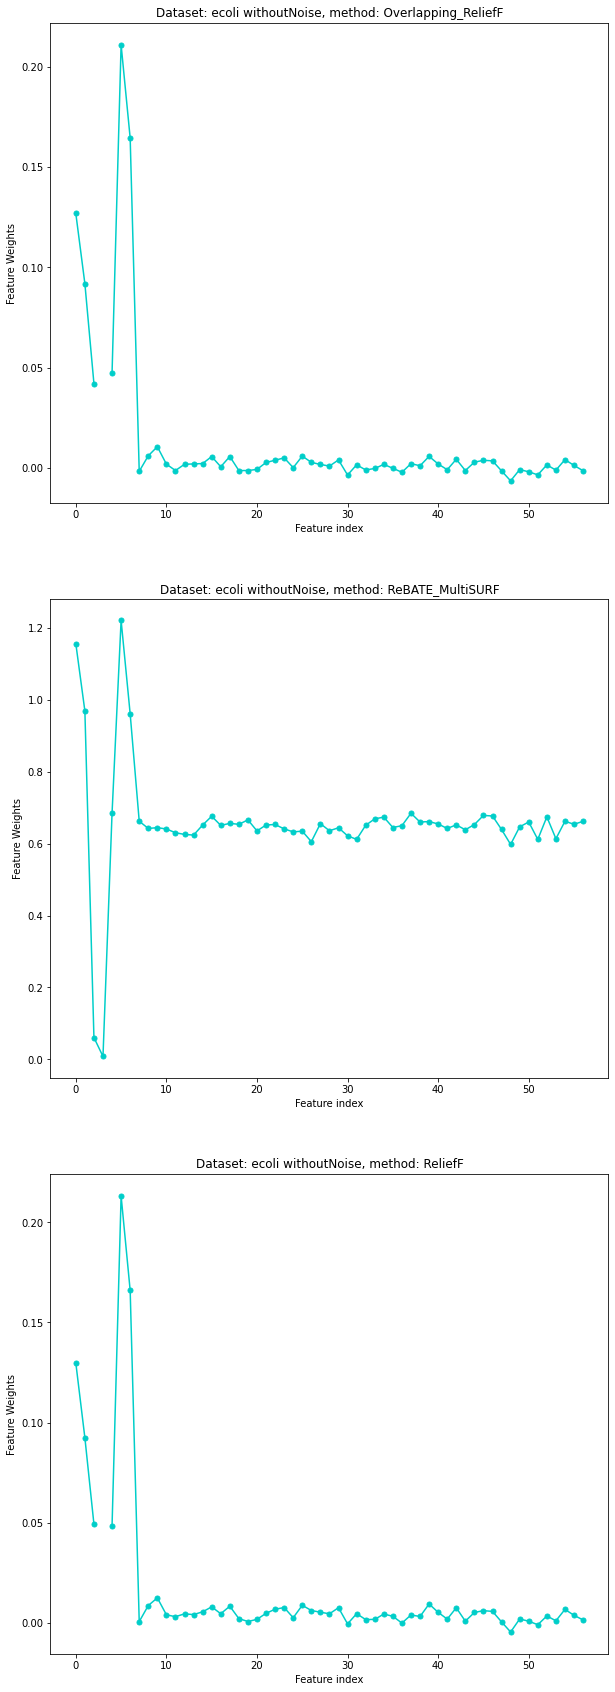

In [ ]:
run_and_save_output(dName = 'ecoli')
# run_and_save_output(dName = 'ecoli', noisePercentage=10)
plotting_accuracy('ecoli')
plotting_roc('ecoli')
plotting_weights('ecoli')

###  Lung

dataset: lung
instances = 32, features= 56 
Dataset Name : lung
#features                        1    7    13   19  ...   37   43   49   56
Classifier Method                                   ...                    
KNN        ReliefF              0.5  0.4  0.5  0.5  ...  0.5  0.5  0.5  0.5
           Overlapping_ReliefF  0.5  0.4  0.5  0.5  ...  0.5  0.5  0.5  0.5
           ReBATE_MultiSURF     0.5  0.5  0.5  0.4  ...  0.5  0.5  0.5  0.5
SVM        ReliefF              0.5  0.6  0.7  0.6  ...  0.5  0.4  0.4  0.4
           Overlapping_ReliefF  0.5  0.6  0.6  0.6  ...  0.5  0.4  0.4  0.4
           ReBATE_MultiSURF     0.5  0.6  0.5  0.6  ...  0.5  0.5  0.5  0.5

[6 rows x 10 columns]
ConfusionMatrix for the dataset lung and classifier SVM (Noisy = False)
#features                          1         7   ...        49        56
Method              Classes                      ...                    
ReliefF             1.0      A=5,TP=0  A=5,TP=1  ...  A=5,TP=0  A=5,TP=0
              

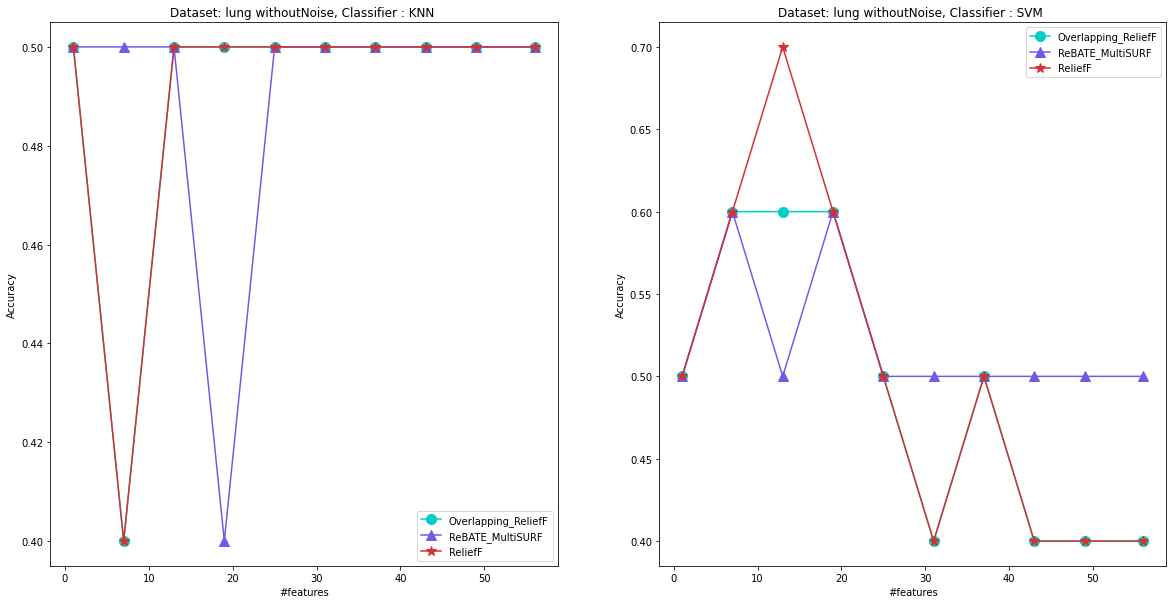

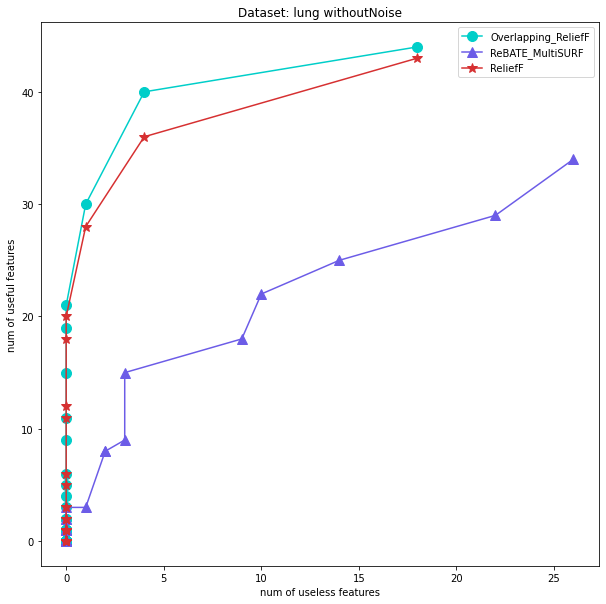

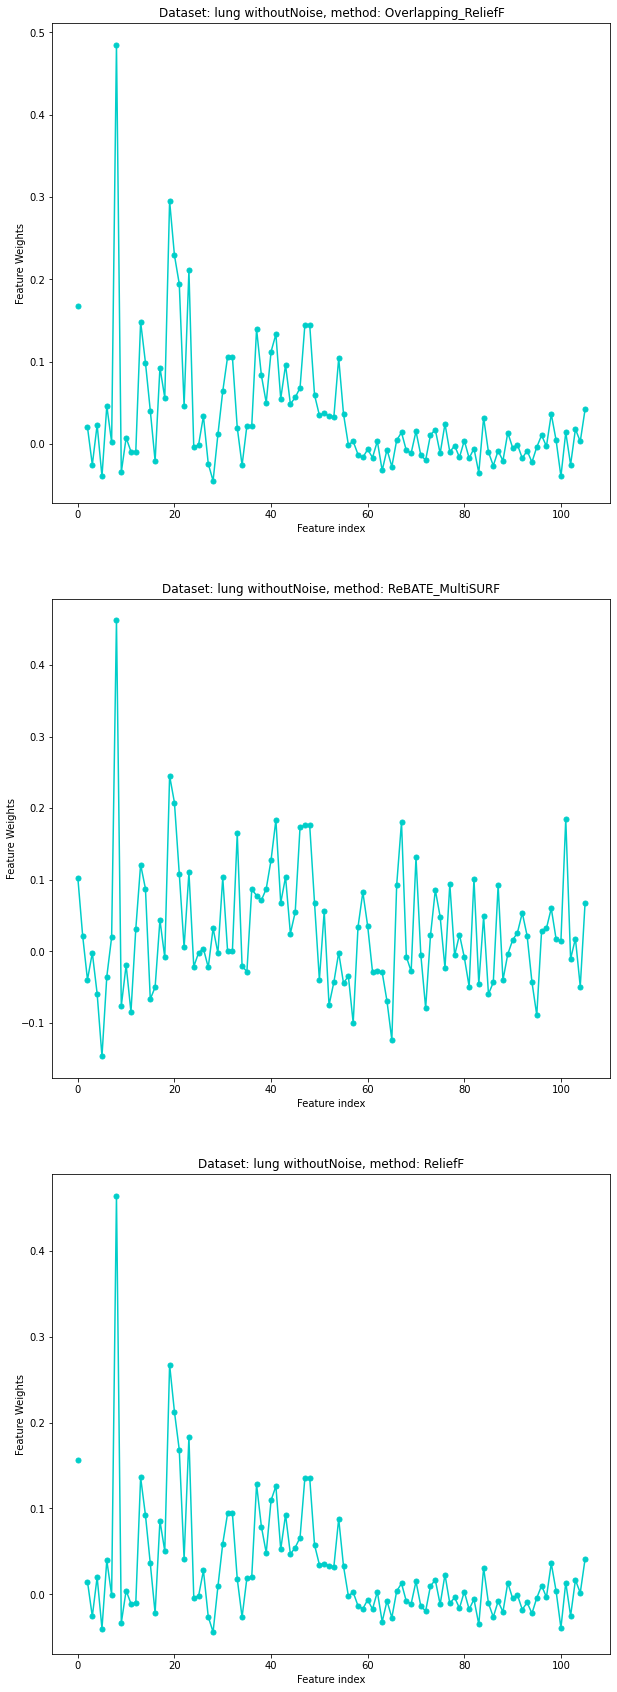

In [ ]:
run_and_save_output(dName = 'lung')
# run_and_save_output(dName = 'lung', noisePercentage=10)
plotting_accuracy('lung')
plotting_roc('lung')
plotting_weights('lung')

### Multiple Features


In [ ]:
run_and_save_output(dName = 'multipleFeature')
# run_and_save_output(dName = 'multipleFeature', noisePercentage=10)
plotting_accuracy('multipleFeature')
plotting_roc('multipleFeature')
plotting_weights('multipleFeature')

dataset: multipleFeature
instances = 2000, features= 649 


#Heart

In [ ]:
run_and_save_output(dName = 'heart')
# run_and_save_output(dName = 'heart', noisePercentage=10)
plotting_accuracy('heart')
plotting_roc('heart')
plotting_weights('heart')

### Segmentation

In [ ]:
run_and_save_output(dName = 'segmentation')
# run_and_save_output(dName = 'segmentation', noisePercentage=10)
plotting_accuracy('segmentation')
plotting_roc('segmentation')
plotting_weights('segmentation')

### Ionosphere

In [ ]:
run_and_save_output(dName = 'ionosphere')
# run_and_save_output(dName = 'ionosphere', noisePercentage=10)
plotting_accuracy('ionosphere')
plotting_roc('ionosphere')
plotting_weights('ionosphere')

##Glass(Imbalanced)

In [ ]:
run_and_save_output(dName = 'glass')
# run_and_save_output(dName = 'glass', noisePercentage=10)
plotting_accuracy('glass')
plotting_roc('glass')
plotting_weights('glass')

##Parkinsons

In [ ]:
run_and_save_output(dName = 'parkinsons')
# run_and_save_output(dName = 'parkinsons', noisePercentage=10)
plotting_accuracy('parkinsons')
plotting_roc('parkinsons')
plotting_weights('parkinsons')

### Digits

In [ ]:
run_and_save_output(dName = 'digits')
# run_and_save_output(dName = 'digits', noisePercentage=10)
plotting_accuracy('digits')
plotting_roc('digits')
plotting_weights('digits')